# NYRE Report

#### Logan Colón
#### LCC82

# 0. Table of Contents
#### 1. Introduction & Hypothesis
>##### i.   Abstraction
>##### ii.  The Investigation
>##### iii. Hypothesis
#### 2. Data & Methods
>##### i. Dataset Description
>##### ii. Scraping Process
>##### iii. Imports and Installations
>##### iv. Preliminary Data Exploration
>##### v. NLP Analysis
>>###### a. Word Cloud
>>###### b. Clustering
>>###### c. Sentiment Analysis
>>###### d. N-gram Analysis
>>###### e. Model Creation
>>###### f. Statistical Validation
#### 3. Results breakdown 
>##### i. Word Cloud
>##### ii. Clustering
>##### iii. Sentiment Analysis
>##### iv. N-gram Analysis
>##### v. Model Creation
>##### vi. Statistical Validation
#### 4. Discussions and Conclusions 
>##### i. Limitations
>##### ii. Overall Conclusions
>##### iii. What's Next

# 1. Introduction & Hypothesis

### Abstraction

Consumer buying behavior relies heavily on buyer preferences and constraints. Advertisements act as a buy stimulant, it makes the consumer think about whether they should buy a product or not. Ads leverage brand awareness, cultural trends and other product attributes to convince the consumer to buy. Consumers like to think that ads (even the five second ones on social media platforms) are a mere nuisance and ultimately have no influence on their buying behavior. That's simply incorrect. I mean look at the Superbowl, a 30 second ad would cost over 5 million dollars, if ads really don't have an effect on people why would companies purchase/invest so heavily in them.

Ads are an essentially a way to caputre the interest of the market. Advertising strategy is an invaluable asset to a seller. Advertisements can be found on nearly every medium of public information. Ads induce market rivarly, it is important for products to establish a niche and caputre an audience. Companies must make good ads that catch attention and establish product differation.

### The investigation

I think it is plausible to assume that products with better brand features as well as being more well known will naturally be more appealing to a consumer base. It's an abstraction of the market placebo effect except with features instead of money. This is a fundamental concept to effective advertising.  I want to investigate if this axiom works in the realm of real estate.

A great place to pursue this investigation is New York City. The city offers a variety of housing options to a microcosm of the American populace. Knowing that there are 5 distinct districts in New York City, it wouldn't be too difficult to break up the properties. It would be interesting to investigate if there is a different advertising strategy in New York City Real estate amongst each borough. Utilizing a web scraper to obtain listing descriptions, it is possible to get an advert for each individual property. Is the exclusivity of a property reflected in the ads for it? Would it ultimately be possible to predict property location based on a listing description? 

###### *These questions fit with the data I could scrape, this is further explored in the discussion and conclusions section*

### Hypothesis

#### Main Prospectus: 
##### Is there is a difference in advertising strategy in New York City Real estate amongst each borough. Is the exclusivity of a district reflected in the ads for it?

#### Hypothesis: 
##### I predict there will be a significant difference in content for the listings in each district. It will be possible to develop a model to predict borough.

# 2. Data & Methods

### Dataset Description

The dataset I will be using are scrapped listings from Trulia. Through the use of beautifulsoup I was able to scrape important property attributes from Trulia like price, address and listing description. These descriptions act as the advertisements for buyers and will be the heart of the experiment. I didn't extract square footage, # of bedrooms and other attributes like these because it isn't necessary for this experiment. The scrapper would also fail at execution for some of the listings due to missing data.

### Scrapper Process

#### 1. Create list of 50 Trulia listing Webpages. 
###### *NOTE I DID NOT USE ALL 2000 ENTRIES DUE TO MISSING DATA STOPPING EXECUTION, METHOD CAN STILL BE IMPROVED*
###### *ALL OF THE CODE BELOW WAS DONE IN A COLAB ENVIRONMENT*

In [1]:
# from bs4 import BeautifulSoup
# import requests
# import pandas as pd 
# import urllib.parse
# websites = []
# detailed_websites = []
# for x in range(1,51):
#     websites.append('https://www.trulia.com/NY/New_York/'+str(x)+'_p/')

#### 2. Create list that has URL for each listing on the main webpages above. 

In [2]:
# headers = ({'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36 Edg/96.0.1054.62'})
# for y in websites:
#   response = requests.get(y, headers=headers)
#   soup = BeautifulSoup(response.content, 'html.parser')
#   project_href = [i['href'] for i in soup.find_all('a',{'class' : 'Anchor__StyledAnchor-sc-5lya7g-1 gLFHbk'}, href=True)]
#   for z in project_href:
#     detailed_websites.append(z)
# print(detailed_websites)

# def flatten_list(t):
#   flat_list=[]
#   for sublist in t:
#     print(sublist)
#     for item in sublist:
#       print(item)

# web_list_draft = pd.Series(detailed_websites).unique().tolist()
# web_list = []
# for x in web_list_draft:
#     web_list.append('https://www.trulia.com/'+str(x))
# web_list = pd.Series(web_list).unique().tolist()
# web_list.remove('https://www.trulia.com/https://www.zillow.com/info/real-estate-licenses')
# web_list.remove('https://www.trulia.com/https://s.zillow.net/pfs/static/SOP_NYS.pdf')
# web_list.remove('https://www.trulia.com/https://s.zillow.net/pfs/static/TREC_ZINC_1-25-21.pdf')
# web_list.remove('https://www.trulia.com/https://www.trec.texas.gov/sites/default/files/pdf-forms/CN%201-3.pdf')
# web_list.remove('https://www.trulia.com/https://www.trulia.com/info/contact-us/')
# web_list.remove('https://www.trulia.com/https://support.trulia.com/hc/en-us/requests/new?ticket_form_id=360000050828')
# print(len(web_list))

#### 3. Extract Attributes from each URL

In [3]:
# description_data =[]
# price_data=[]
# address_data = []
# ac_data = []

# for i,b in enumerate(web_list[0:1300]):
#   resd=[]
#   resp=[]
#   resaddp1=[]
#   rehigh=[]
#   website = b
#   print(i)
#   headers = ({'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/96.0.4664.110 Safari/537.36 Edg/96.0.1054.62'})
#   response = requests.get(website, headers=headers)
#   soup = BeautifulSoup(response.content, 'html.parser')
#   results = soup.find_all('div')
#   descriptions = [result.find('div', {'data-testid':'home-description-text-description-text'}) for result in results]
#   prices = [result.find('div', {'data-testid':'home-details-sm-lg-xl-price-details'}) for result in results]
#   addp1 = [result.find('div', {'data-testid':'home-details-summary-address'}) for result in results]
#   details = [result.find('div', {'data-testid':'home-highlights-container'}) for result in results]
#   for val in descriptions:
#     if val != None :
#         resd.append(val)
#   description_data.append(resd[0].get_text())
#   for val in prices:
#     if val != None:
#       resp.append(val)
#   price_data.append(resp[0].get_text().split('Est.')[0])
#   for val in addp1:
#     if val != None:
#       resaddp1.append(val)
#   address_data.append(resaddp1[0].get_text().split('NY')[0] +'NY')
#   for val in details:
#     if val != None:
#       rehigh.append(val)
#   ac_data.append(rehigh[0].get_text().split('A/C')[1].split('HOA')[0])

# prices = pd.Series(price_data)
# descriptions = pd.Series(description_data)
# adresses = pd.Series(address_data)
# AC = pd.Series(ac_data)

#### 4. Create dataframe, lightly clean and add location attributes

In [4]:
# data = pd.DataFrame({'Location': adresses, 'Price': prices, 'A/C' : AC, 'Description' : descriptions}).reset_index()

# data = data[['Location','Price','A/C','Description']]
# data.head()

# actual_prices = []
# for x in data.Price:
#   temp = x.split('$')[1].split('Original price:')[0]
#   temp2 = temp.split('+')[0]
#   actual_prices.append(int(temp2.replace(',','')))
# data['Price'] = actual_prices

In [5]:
# boroughs=['Bronx', 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'New York', 'UpperLaurelton',
#           'Alphabet City', 'Battery Park City', 'Carnegie Hill', 'Chelsea', 'Chinatown', 'East Harlem', 'East Village', 'Financial District',
#           'Flatiron District', 'Gramercy Park', 'Greenwich Village', 'Harlem', 'Hells Kitchen', 'Clinton', 'Inwood', 'Kips Bay', 'Lincoln Square', 
#           'Lower East Side', 'Manhattan Valley', 'Midtown East', 'Morningside Heights', 'Murray Hill', 'Little Italy', 'Roosevelt Island', 'SoHo', 
#           'Tribeca', 'Upper East Side', 'Upper West Side', 'Washington Heights', 'West Village', 'Baychester', 'Co-op City', 'Bedford Park', 'Belmont',
#           'Bronxdale', 'Castle Hill', 'City Island', 'Concourse Village', 'Morrisania', 'Country Club', 'Fieldston', 'Fordham', 'Hunts Point', 
#           'Kingsbridge', 'Kingsbridge Heights', 'Melrose', 'Morris Heights', 'Morris Park', 'Mott Haven', 'Parkchester', 'Pelham Bay', 'Pelham Gardens', 
#           'Pelham Parkway', 'Port Morris', 'Riverdale', 'Soundview', 'Throgs Neck', 'Tremont', 'University Heights', 'Wakefield', 'Williamsbridge', 
#           'Woodlawn', 'Arverne', 'Astoria', 'Bayside', 'Beechhurst', 'Belle Harbor', 'Neponsit', 'Bellerose', 'Briarwood', 'Broad Channel', 
#           'Cambria Heights', 'College Point', 'Corona', 'Douglaston', 'East Elmhurst', 'Elmhurst', 'Far Rockaway', 'Floral Park', 'Flushing', 
#           'Forest Hills', 'Fresh Meadows', 'Glen Oaks', 'Glendale', 'Hillcrest', 'Hollis', 'Hollis Hills', 'Howard Beach', 'Jackson Heights', 'Jamaica', 
#           'Jamaica Estates', 'Jamaica Hills', 'Kew Gardens', 'Laurelton', 'Little Neck', 'Long Island City', 'Maspeth', 'Middle Village', 'Oakland Gardens', 
#           'Ozone Park', 'Queens Village', 'Rego Park', 'Richmond Hill', 'Ridgewood', 'Rockaway Park', 'Rosedale', 'South Jamaica', 'South Ozone Park', 
#           'Springfield Gardens', 'St. Albans', 'Sunnyside', 'Whitestone', 'Woodhaven', 'Woodside', 'Bath Beach', 'Bay Ridge', 'Bedford-Stuyvesant',
#           'Bensonhurst', 'Bergen Beach', 'Boerum Hill', 'Borough Park', 'Brighton Beach', 'Brooklyn Heights', 'Brownsville', 'Bushwick', 'Canarsie', 
#           'Carroll Gardens', 'Cobble Hill', 'Coney Island', 'Crown Heights', 'Cypress Hills', 'Downtown Brooklyn', 'Dumbo', 'Vinegar Hill', 'Dyker Heights', 
#           'East New York', 'Flatbush', 'Flatlands', 'Fort Greene', 'Clinton Hill', 'Gerritsen Beach', 'Gowanus', 'Gravesend', 'Greenpoint', 'Greenwood Heights', 
#           'Manhattan Beach', 'Marine Park', 'Midwood', 'Mill Basin', 'Park Slope', 'Prospect Heights', 'Prospect Park South', 'Kensington', 'Red Hook', 
#           'Sea Gate', 'Sheepshead Bay', 'Sunset Park', 'Williamsburg', 'Windsor Terrace', 'Annadale', 'Arden Heights', 'Arrochar', 'Bulls Head', 
#           'Castleton Corners', 'Charleston', 'Clifton', 'Dongan Hills', 'Eltingville', 'Emerson Hill', 'Graniteville', 'Grant City', 'Grasmere', 'Concord', 
#           'Great Kills', 'Grymes Hill', 'Huguenot', 'Livingston', 'Manor Heights', 'Mariners Harbor', 'Midland Beach', 'New Brighton', 'New Dorp', 
#           'New Springville', 'Oakwood', 'Pleasant Plains', 'Port Richmond', 'Richmondtown', 'Rosebank', 'Rossville', 'Shore Acres', 'Silver Lake', 
#           'South Beach', 'St. George', 'Stapleton', 'Todt Hill', 'Tompkinsville', 'Tottenville', 'Travis', 'West New Brighton', 'Westerleigh',
#           'Willowbrook', 'Woodrow','BRONX', 'Ditmas Park', 'Kew Garden Hills']

In [6]:
# count=0
# for x in boroughs:
#   for y in data.Location:
#     if (x in y):
#       count+=1
#       data['Location'][data['Location'] == y] = y.split(x)[0]+' '+str(x)+', NY'
# print(count)
# data['longitude'] = pd.Series(np.zeros(len(data)))
# data['latitude'] = pd.Series(np.zeros(len(data)))

In [7]:
# !pip install geopandas
# !pip install geopy
# from geopy.geocoders import ArcGIS

# locator = ArcGIS(user_agent="http")
# for x in data.Location:
#   location = locator.geocode(x)
#   if(location):
#     data['longitude'][data['Location'] == y] = location.longitude
#     data['latitude'][data['Location'] == y] = location.latitude
#   else:
#     print(0)

#### 5. Export final dataframe for Jupyter Lab Usage

In [8]:
#data.to_excel("zillow.xlsx")  

### Imports and Installations

In [160]:
%%capture
!pip install geopy
!pip install openpyxl
!pip install geopandas
!pip install descartes
%matplotlib inline

import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict, Counter
import random
import requests

import sys
import os
import spacy
import geopandas as gpd
import urllib.parse
from geopy.geocoders import ArcGIS, Nominatim
import re
import nltk
from nltk.util import ngrams

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import classification_report
from sklearn.metrics.pairwise import cosine_distances, cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.cluster import KMeans, SpectralClustering, DBSCAN, OPTICS, AgglomerativeClustering
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LinearRegression, LogisticRegression

import string
from nltk.corpus import stopwords
from nltk import word_tokenize, sent_tokenize
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS

plt.rcParams["figure.figsize"] = (8,8)
warnings.filterwarnings("ignore")

### Preliminary Data Exploration

#### Generation of New York City Map

In [10]:
ny_map = gpd.read_file('Downloads/nynta2020_22a/nynta2020.shp')

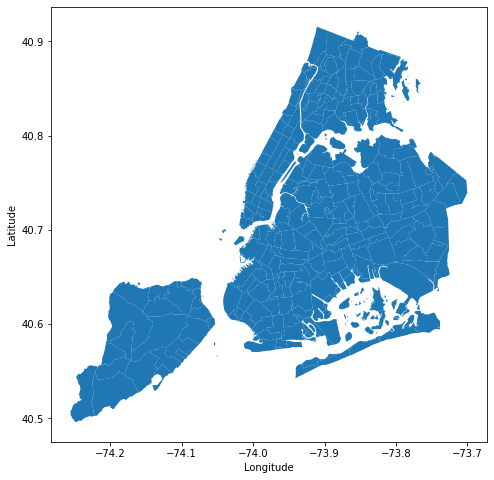

In [11]:
ny_map.to_crs(epsg=4326).plot()
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

#### Import dataset to show property locations

In [12]:
data = pd.read_excel('Downloads/zillow.xlsx')
data.head()
data = data[data.latitude < 42]

In [13]:
geometry = gpd.points_from_xy(data['longitude'], data['latitude'])
geo_df = gpd.GeoDataFrame(data, 
                          crs = {'init':'EPSG:4326'}, 
                          geometry = geometry)

#### Add borough entry to data

In [14]:
borough_list = []

In [15]:
geolocator = ArcGIS(user_agent="http")
for i in range(len(geo_df)):
    location = geolocator.reverse(str(geo_df.latitude.iloc[i])+','+str(geo_df.longitude.iloc[i]))
    borough_list.append(location.raw['Subregion'])

In [16]:
borough_list = [s.replace('Kings County', 'Brooklyn') for s in borough_list]
borough_list = [s.replace('New York County', 'Manhattan') for s in borough_list]
borough_list = [s.replace('Queens County', 'Queens') for s in borough_list]
borough_list = [s.replace('Richmond County', 'Staten Island') for s in borough_list]
borough_list = [s.replace('Bronx County', 'Bronx') for s in borough_list]
borough_list = [s.replace('Mannhattan', 'Manhattan') for s in borough_list]

In [17]:
geo_df['Borough'] = pd.Series(borough_list)

In [18]:
geo_df.groupby('Borough').count()

,Location,Price,A/C,Description,longitude,latitude,geometry
Borough,,,,,,,
Bronx,87,87,87,87,87,87,87
Brooklyn,272,272,272,272,272,272,272
Manhattan,351,351,351,351,351,351,351
Queens,317,317,317,317,317,317,317
Staten Island,122,122,122,122,122,122,122


In [19]:
geo_df = geo_df.dropna()

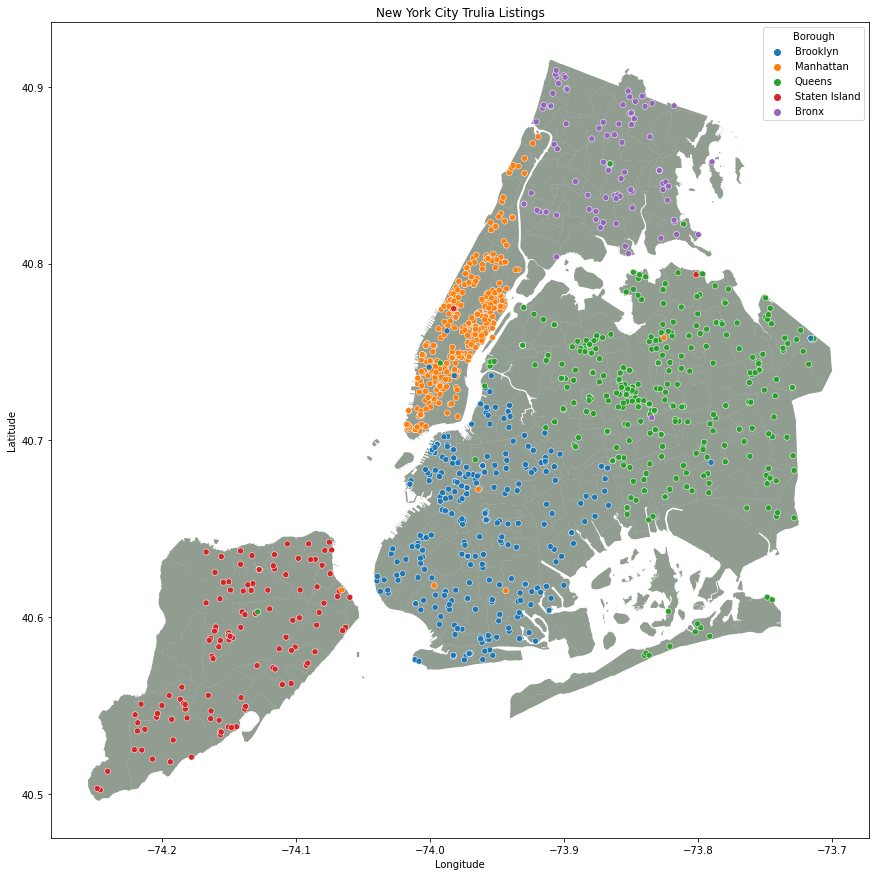

In [20]:
fig, ax = plt.subplots(figsize = (15,15))
sns.scatterplot(ax=ax, x="longitude", y="latitude", hue="Borough", data=geo_df, zorder=1)
ny_map.to_crs(epsg=4326).plot(ax=ax, color='#132a1375', zorder = 0)
ax.set_title('New York City Trulia Listings')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

##### ArcGIS isn't perfect...

##### Display Attribute Maps

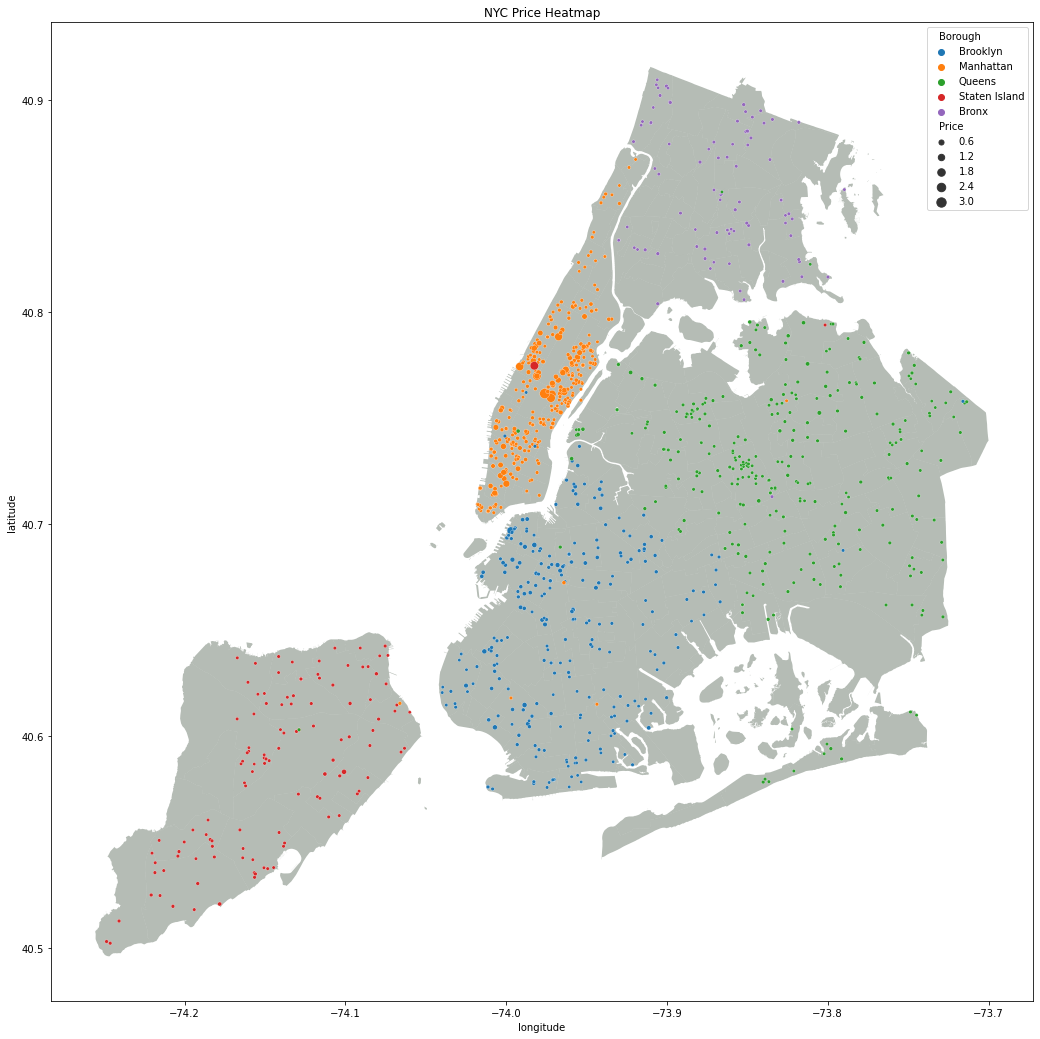

In [21]:
geo_df['price_log'] = np.log(geo_df['Price'])
fig, ax = plt.subplots(figsize = (18,18))
ny_map.to_crs(epsg=4326).plot(ax=ax, color='#132a1350', zorder=0)
sns.scatterplot(ax=ax, x="longitude", y="latitude", hue="Borough",
                data=geo_df, size= "Price", zorder=1, sizes = (10,100))
ax.set_title('NYC Price Heatmap')
plt.show()

The ARCgis locator isn't perfect but most of the entries are in the right district. I could try to clean them based on latitude values

In [22]:
geo_df[['longitude','latitude','Borough']].groupby('Borough').describe()
bronx_mean = -73.866727
bronx_std = 0.033742
brooklyn_mean = -73.962286
brooklyn_std = 0.040424
manhattan_mean = -73.975845
manhattan_std = 0.023048
queens_mean = -73.831036
queens_std = 0.060079
staten_mean = -74.137823
staten_std = 0.054753

bronx_lamean = 40.856845
bronx_lastd = 0.032858
brooklyn_lamean = 40.651742
brooklyn_lastd = 0.041398
manhattan_lamean = 40.760186
manhattan_lastd = 0.034291
queens_lamean = 40.725803
queens_lastd = 0.042173
staten_lamean = 40.588566
staten_lastd = 0.045001

In [23]:
Bronx = geo_df[geo_df.Borough == 'Bronx'].loc[(geo_df.latitude >= bronx_lamean - 2* bronx_lastd) & (geo_df.latitude < bronx_lamean + 2* bronx_lastd) &
                                     (geo_df.longitude >= bronx_mean - 2* bronx_std) & (geo_df.longitude < bronx_mean + 2* bronx_std)]
Brooklyn = geo_df[geo_df.Borough == 'Brooklyn'].loc[(geo_df.latitude >= brooklyn_lamean - 2* brooklyn_lastd) & (geo_df.latitude < brooklyn_lamean + 2* brooklyn_lastd) &
                                     (geo_df.longitude >= brooklyn_mean - 2* brooklyn_std) & (geo_df.longitude < brooklyn_mean + 2* brooklyn_std)]
Manhattan = geo_df[geo_df.Borough == 'Manhattan'].loc[(geo_df.latitude >= manhattan_lamean - 2* manhattan_lastd) & (geo_df.latitude < manhattan_lamean + 2* manhattan_lastd) &
                                     (geo_df.longitude >= manhattan_mean - 2* manhattan_std) & (geo_df.longitude < manhattan_mean + 2* manhattan_std)]
Queens = geo_df[geo_df.Borough == 'Queens'].loc[(geo_df.latitude >= queens_lamean - 2* queens_lastd) & (geo_df.latitude < queens_lamean + 2* queens_lastd) &
                                     (geo_df.longitude >= queens_mean - 2* queens_std) & (geo_df.longitude < queens_mean + 2* queens_std)]
Staten = geo_df[geo_df.Borough == 'Staten Island'].loc[(geo_df.latitude >= staten_lamean - 2* staten_lastd) & (geo_df.latitude < staten_lamean + 2* staten_lastd) &
                                     (geo_df.longitude >= staten_mean - 2* staten_std) & (geo_df.longitude < staten_mean + 2* staten_std)]

In [24]:
Bronx = pd.DataFrame(Bronx)
Brooklyn = pd.DataFrame(Brooklyn)
Manhattan = pd.DataFrame(Manhattan)
Queens = pd.DataFrame(Queens)
Staten = pd.DataFrame(Staten)

In [25]:
geo_df = Bronx.append(Brooklyn).append(Manhattan).append(Queens).append(Staten)
geo_df.reset_index(drop=True)

,Location,Price,A/C,Description,longitude,latitude,geometry,Borough,price_log
0,"3536 Webster Ave Bronx, NY",800000,No,Triumph Property Group is happy to present 353...,-73.870853,40.880014,POINT (-73.87085 40.88001),Bronx,13.592367
1,"191 Surf Dr #120 Bronx, NY",499000,No,Picture perfect luxury three-bedroom two-bathr...,-73.852066,40.805746,POINT (-73.85207 40.80575),Bronx,13.120361
2,"3725 Henry Hudson Pkwy W #6C Bronx, NY",330000,No,New to the Market!! Come view this 2 bedroom /...,-73.910153,40.888949,POINT (-73.91015 40.88895),Bronx,12.706848
3,"3121 Middletown Rd #7C Bronx, NY",149000,No,This No Board Approval Alcove Studio located i...,-73.826315,40.845470,POINT (-73.82632 40.84547),Bronx,11.911702
4,"1505 Archer Road UNIT 12F BRONX, NY",275000,Heating & Cooling,Great views & great investment. 1505 Archer Rd...,-73.862393,40.838535,POINT (-73.86239 40.83853),Bronx,12.524526
...,...,...,...,...,...,...,...,...,...
1088,"964 Rockland Ave Staten Island, NY",839964,Heating & Cooling,Pre Construction - 1st pair of 5 pairs of 1 fa...,-74.149375,40.589197,POINT (-74.14938 40.58920),Staten Island,13.641114
1089,"67 Covington Cir Staten Island, NY",1299900,Heating & Cooling,"Magnificent one family, 4-bedroom, 4-bath colo...",-74.203515,40.545501,POINT (-74.20352 40.54550),Staten Island,14.077798
1090,"90 10th St Staten Island, NY",850000,Heating only,VERY CONVENIENTLY LOCATED 4 BEDROOM COLONIAL W...,-74.115837,40.570650,POINT (-74.11584 40.57065),Staten Island,13.652992
1091,"156 Whitewood Ave Staten Island, NY",1199000,Heating & Cooling,"This Beautiful Large Colonial Home (3,300 sq. ...",-74.107803,40.624020,POINT (-74.10780 40.62402),Staten Island,13.996998


###### Took out 56 entries.

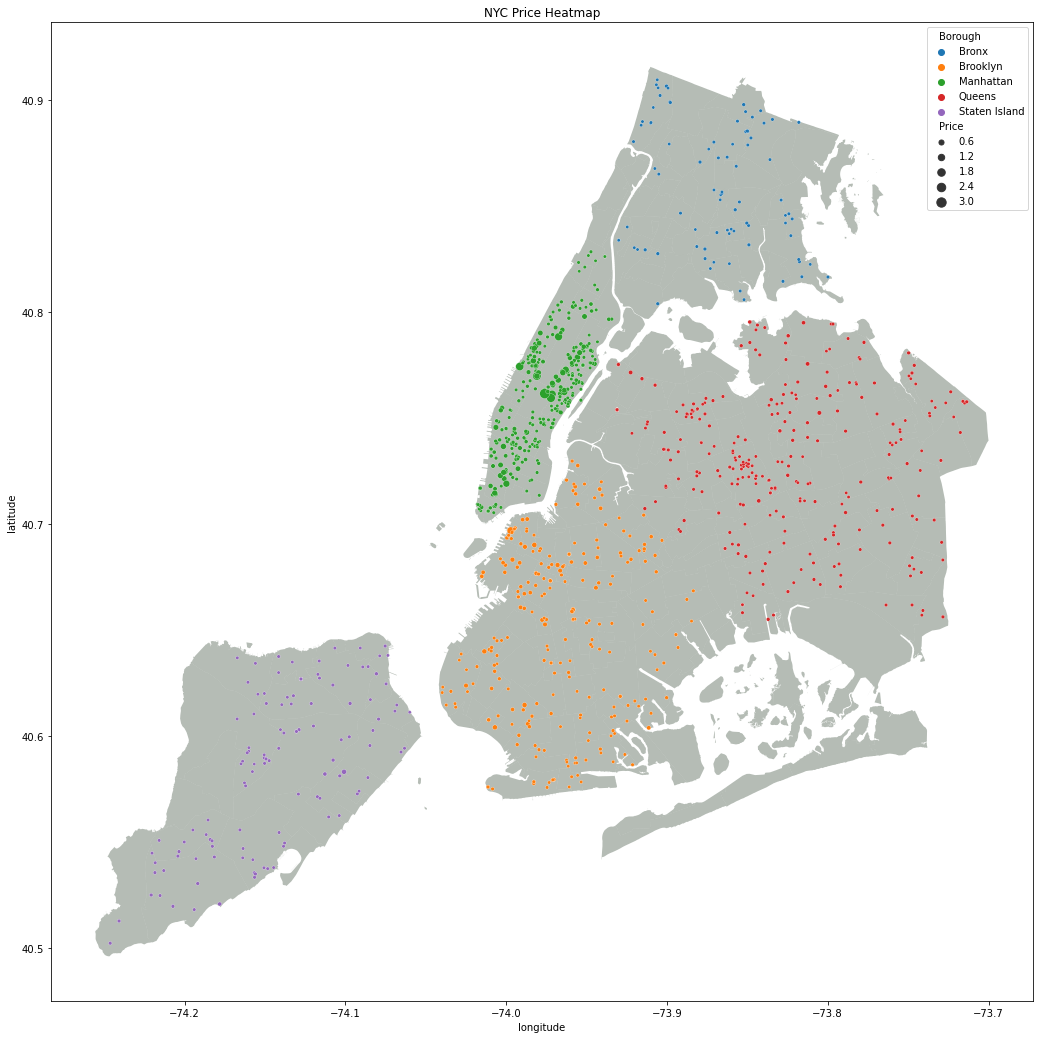

In [26]:
fig, ax = plt.subplots(figsize = (18,18))
ny_map.to_crs(epsg=4326).plot(ax=ax, color='#132a1350', zorder=0)
sns.scatterplot(ax=ax, x="longitude", y="latitude", hue="Borough",
                data=geo_df, size= "Price", zorder=1, sizes = (10,100))
ax.set_title('NYC Price Heatmap')
plt.show()

There's some data lost but most is preserved in an accurate manner.

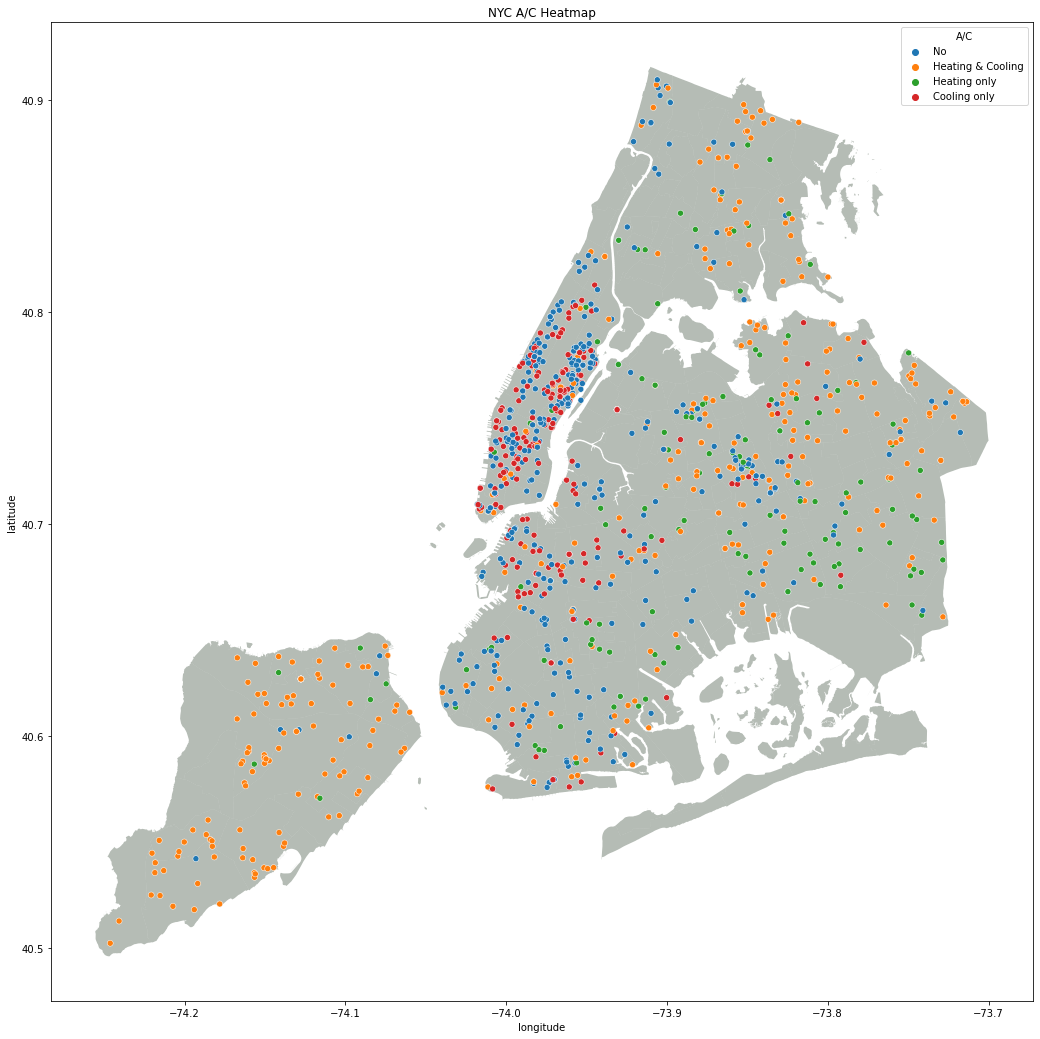

In [27]:
fig, ax = plt.subplots(figsize = (18,18))
ny_map.to_crs(epsg=4326).plot(ax=ax, color='#132a1350', zorder=0)
sns.scatterplot(ax=ax, x="longitude", y="latitude", hue="A/C",
                data=geo_df, zorder=1)
ax.set_title('NYC A/C Heatmap')
plt.show()

<AxesSubplot:xlabel='Borough', ylabel='price_log'>

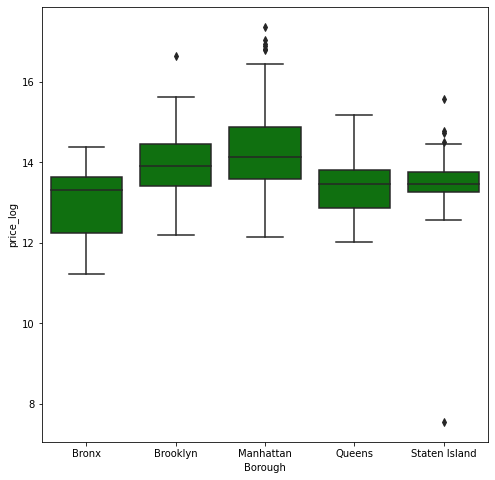

In [28]:
sns.boxplot(y=geo_df['price_log'],x=geo_df['Borough'],color ='green')

Interesting how Manhattan properties tend to be the most expensive but mostly don't have heating and cooling listed. I suppose this is because most of these listings are extremely nice places that have many amenities. Heating and Cooling is most likely provided. 

Or these listings might actually not have these amenities, some of the buildings might be old and their value is derived mostly from their location and/or inclusion of other amenities.

## Q1: Is there is a difference in advertising descriptions in New York City Real estate amongst each borough. Is the exclusivity of a district reflected in the ads for it?

### NLP Analysis

#### Corpus Construction

##### Total Description Count

In [29]:
descriptions = [doc for doc in geo_df['Description']]
print("Total descriptions:", len(descriptions))

Total descriptions: 1093


##### Corpus Construction and Subsetted by Borough

In [30]:
corpus = []
corpus.extend(doc for doc in geo_df['Description'])

In [31]:
manhattan_d = [doc for doc in geo_df.Description[geo_df.Borough=='Manhattan']] 
print("Total Manhattan descriptions:", len(manhattan_d))

Total Manhattan descriptions: 336


In [32]:
queens_d = [doc for doc in geo_df.Description[geo_df.Borough=='Queens']] 
print("Total Queens descriptions:", len(queens_d))

Total Queens descriptions: 294


In [33]:
bronx_d = [doc for doc in geo_df.Description[geo_df.Borough=='Bronx']] 
print("Total Bronx descriptions:", len(bronx_d))

Total Bronx descriptions: 85


In [34]:
staten_d = [doc for doc in geo_df.Description[geo_df.Borough=='Staten Island']] 
print("Total Staten Island descriptions:", len(staten_d))

Total Staten Island descriptions: 119


In [35]:
brooklyn_d = [doc for doc in geo_df.Description[geo_df.Borough=='Brooklyn']] 
print("Total Brooklyn descriptions:", len(brooklyn_d))

Total Brooklyn descriptions: 259


#### Word Clouding

I am deciding to start with the word cloud method since it is a great way to identify words used within a text. This will also be useful to evaluate common words used across different subsets of the data.

##### Lemmatization

In [36]:
nlp = spacy.load('en_core_web_lg')

In [37]:
entries = []
for entry in descriptions:
    words_lemmas = []
    doc = nlp(entry)
    words_lemmas= [token.lemma_ for token in doc]
    entries.append(words_lemmas)

##### General description word cloud

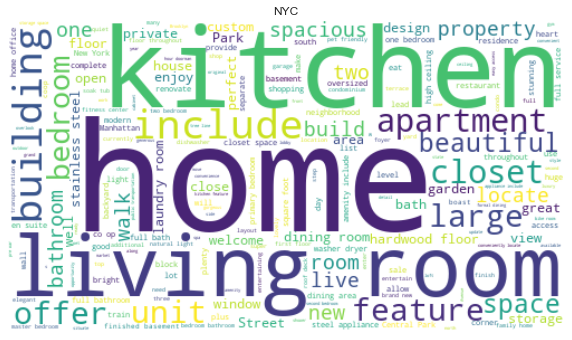

In [143]:
words = [' '.join([str(c) for c in lst]) for lst in entries]
words = ' '.join(words)
wordcloud = WordCloud(background_color='white', mask=mask).generate(words)

plt.imshow(wordcloud, interpolation='bilInear')
plt.rcParams["figure.figsize"] = (10,10)
plt.axis('off')
plt.title('NYC')
plt.show()

The word cloud shows super generic words like room and appliance for all of the locations. This is a good signal of what words I should remove from the corpus for n-gram analysis. I am keeping words like kitchen and home since they might be valuable in the n-gram analysis. 

*I also removed some super general terms found during n-gramming below.*

In [39]:
s = ['e','b','r','w','n','f','m','g','l','room','stainless','steel','appliances','currently','sale','hardwood','hard','wood',
     'trulia','property','lot','zip','ny','new york','sq','sqft','living','dining','area','this','offering']


In [40]:
s.extend(stopwords.words('english'))
for punc in string.punctuation:
    s.append(punc)

##### List of stopwords

In [41]:
print(s)

['e', 'b', 'r', 'w', 'n', 'f', 'm', 'g', 'l', 'room', 'stainless', 'steel', 'appliances', 'currently', 'sale', 'hardwood', 'hard', 'wood', 'trulia', 'property', 'lot', 'zip', 'ny', 'new york', 'sq', 'sqft', 'living', 'dining', 'area', 'this', 'offering', 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'ou

Word cloud helper function below:

In [42]:
def entry_gen(desc):
    entries = []
    for entry in desc:
        words_lemmas = []
        doc = nlp(entry)
        words_lemmas= [token.lemma_ for token in doc]
        entries.append(words_lemmas)
    return entries
def word_clouder(entr):
    m_words = [' '.join([str(c) for c in lst]) for lst in entr]
    m_words = ' '.join(words)
    m_wordcloud = WordCloud(background_color='white',stopwords = s).generate(words)

    plt.imshow(m_wordcloud, interpolation='bilInear')
    plt.rcParams["figure.figsize"] = (10,10)
    plt.axis('off')
    plt.show()

##### Word clouds for each borough

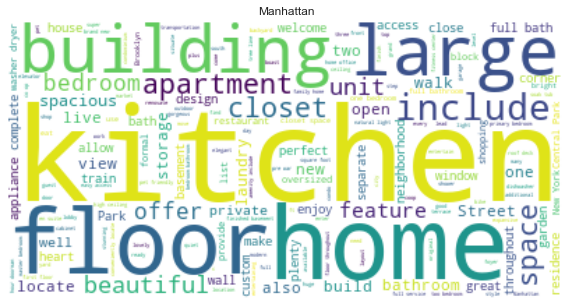

In [144]:
plt.title('Manhattan')
m_entries = entry_gen(manhattan_d)
word_clouder(m_entries)

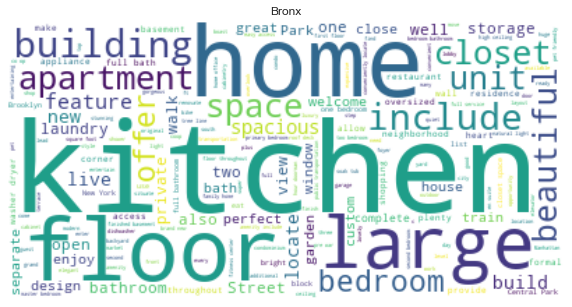

In [145]:
plt.title('Bronx')
b_entries = entry_gen(bronx_d)
word_clouder(b_entries)

In [ ]:
plt.title('Queens')
q_entries = entry_gen(queens_d)
word_clouder(q_entries)

In [ ]:
plt.title('Staten Island')
s_entries = entry_gen(staten_d)
word_clouder(s_entries)

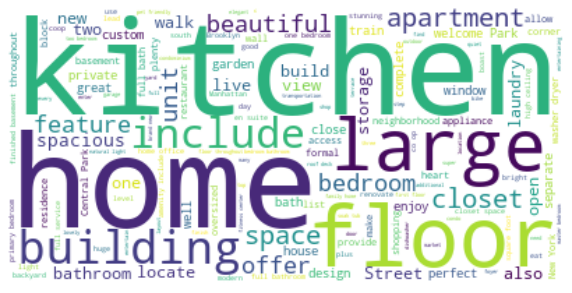

In [47]:
br_entries = entry_gen(brooklyn_d)
word_clouder(br_entries)

The wordclouds essentially act as a unigram for the different boroughs. Since the displays for each borough show no significant change in words displayed then there are a lot of words generally shared within the advertisements (which makes sense). I could remove these stopwords but it wouldn't provide any great results. Real estate advertisements all describe the property in terms of space, features and other attributes. Contextualizing these descriptions and looking for distinct attributes would be more valuable. I suspect utilizing n-gram analysis would provide better results.

Will the same results be produced with prices instead of Borough?

A display of the distribtion of prices would help identify how I should subset the data. I want to do a 50/50 split. Is there a difference in description composition between the cheaper and more expensive properties.

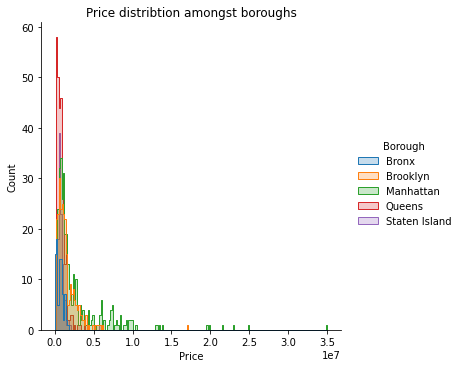

In [48]:
sns.displot(geo_df, x="Price", hue="Borough", element="step")
plt.title('Price distribtion amongst boroughs')
plt.show()

The log price column should be clearer.

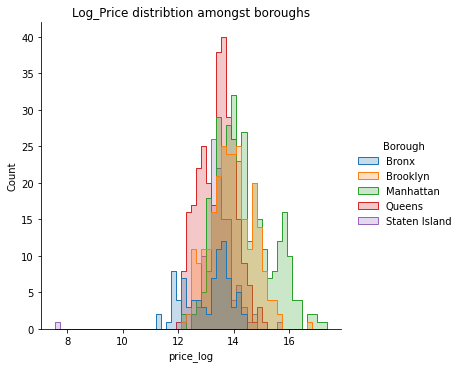

In [49]:
sns.displot(geo_df, x="price_log", hue="Borough", element="step")
plt.title('Log_Price distribtion amongst boroughs')
plt.show()

The split should happen at around 13.7.

In [50]:
first_half = [doc for doc in geo_df.Description[geo_df.price_log <= 13.7]] 
print("First half descriptions:", len(first_half))

First half descriptions: 547


In [51]:
second_half = [doc for doc in geo_df.Description[geo_df.price_log > 13.7]] 
print("Second half descriptions:", len(second_half))

Second half descriptions: 546


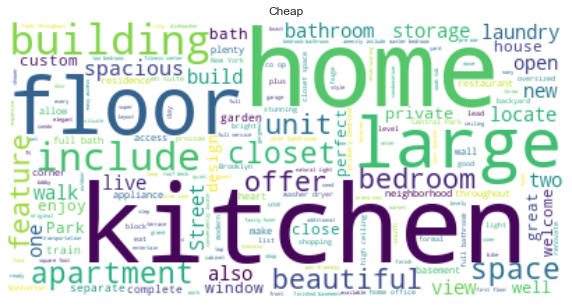

In [147]:
plt.title('Cheap')
cheap_entries = entry_gen(first_half)
word_clouder(cheap_entries)

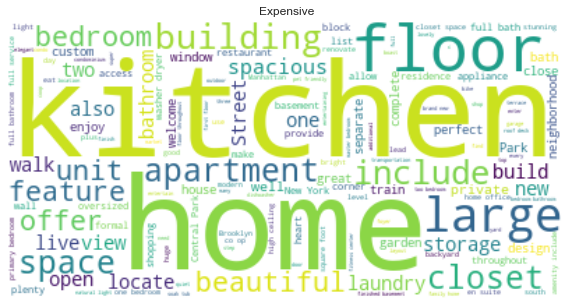

In [148]:
plt.title('Expensive')
exp_entries = entry_gen(second_half)
word_clouder(exp_entries)

Again there isn't a significant difference in the word clouds. Before creating n-gram visualizations, maybe there are underlying factors that make these descriptions distinct. Ward clustering might yield results.

#### Clustering

I will be doing ward clustering, this is a good way to check if there are any underlying factors that group the properties. Ward clustering would work best since the clusters could vary in size easily. I think there's going to be one larger cluster of entries and a bunch of smaller ones surronding the mega cluster. DBScan could be used too but I don't want to remove the outliers.

##### Text Vecotrization and scaling

In [54]:
from   sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(
    input = 'content',
    encoding = 'utf-8',
    strip_accents = 'unicode',
    stop_words='english',
    lowercase = True,
    min_df = 0.1,
    max_df = 0.9
)

X = vectorizer.fit_transform(descriptions)
print("Feature matrix shape:", X.shape)
print("Total vectorized words in the corpus:", X.sum())
print("Average vectorized description length:", int(X.sum()/X.shape[0]), "tokens")

Feature matrix shape: (1093, 193)
Total vectorized words in the corpus: 55955
Average vectorized description length: 51 tokens


In [55]:
sc_x= StandardScaler()
standardX = sc_x.fit_transform(X.toarray())
print('standardized shape: ',standardX.shape)
print('standardized mean: ',np.mean(standardX))

standardized shape:  (1093, 193)
standardized mean:  8.622887065337387e-18


##### Ward Clustering

In [125]:
def plot_compare(X, labels, title, alpha=0.7):
    
    'Credit 3350 problem set'
    coordinates = TruncatedSVD(n_components=2).fit_transform(X)

    fig, ax = plt.subplots(figsize=(12,6))

    plt.subplot(121)
    plt.scatter(
        coordinates[:, 0], 
        coordinates[:, 1], 
        alpha=alpha, 
        linewidths=0 
    )
    plt.title("Unclustered data")

    plt.subplot(122)
    sns.scatterplot(
        x=coordinates[:, 0], 
        y=coordinates[:, 1],
        hue=labels,
        alpha=alpha,
        palette='viridis',
        linewidth=0
    )
    plt.title(title)
    plt.show()


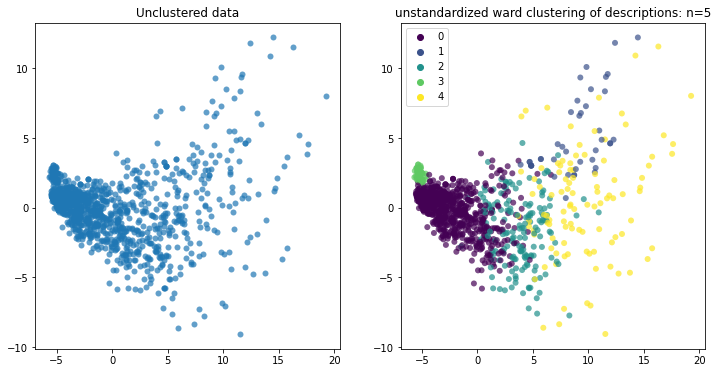

In [57]:
ward = AgglomerativeClustering(n_clusters = 5, linkage="ward")
y_ward = ward.fit_predict(standardX)
plot_compare(standardX, y_ward, 'unstandardized ward clustering of descriptions: n=5') 

The ward clustering doesn't look to good, pulling samples should check this.

In [126]:
def pull_samples(texts, labels, n=1):
    'Credit 3350 Problem Set'
    texts_array = np.array(texts) 
    for label in np.unique(labels):
        print("Label:", label)
        sample_index = np.where(labels == label)[0] 
        print("Number of texts in this cluster:", len(sample_index), '\n')
        chosen = np.random.choice(sample_index, size=n)
        for choice in chosen:
            print("Sample text:", choice)
            print(texts_array[choice], '\n')
        print("###################################")

In [59]:
pull_samples(descriptions, y_ward)

Label: 0
Number of texts in this cluster: 708 

Sample text: 913
Exceptional 1400 sf three bedroom, two and a half bathroom Duplex in Kew Gardens. +1 parking spot for $51,000.Take advantage of this exceptional duplex with access to an outdoor space. This apartment features, large U shaped kitchen with tons of storage, dishwasher, washer and dryer,  and air conditioning in each of the rooms, great deal of closet space (7 closets), light hue hardwood floors throughout. Master bedroom fits a king bed and has an on suite full bathroom. The condo building is amazingly maintained with on-site laundry (4 washers and 4 dryers), parking garage, video intercom for added safety and refuse rooms on every floor. Location is an awesome bonus to this apartment. You are across the street from a plethora of bars, restaurants and food shopping and beautiful Forest Park. Minutes away to all major transportation hubs, bus stops, LIRR (18 mins to Penn Station), subway lines (J, E, F to name a few). Surroun

The ward clustering didn't produce the best results. The samples from each label aren't seperated by borough nor price range, the clustering method likely labeled on how objective the description or word count/repetition.

#### Sentiment Scoring

I doubt it will yield results but what if the descriptions yield different sentiment scores by borough? Specifically are there more positive listings in one borough than another? Leveraging emolex scoring methods this can be investigated.

##### Emolex dictionary initialization

In [127]:
def read_emolex(filepath=None):
    '''
    Credit 3350 problem set'
    '''
    if filepath==None: # Try to find the emolex file
        filepath = os.path.join('emolex.txt')
        if os.path.isfile(filepath):
            pass
        elif os.path.isfile('emolex.txt'):
            filepath = 'emolex.txt'
        else:
            raise FileNotFoundError('No EmoLex file found')
    emolex = defaultdict(dict) # Like Counter(), defaultdict eases dictionary creation
    with open(filepath, 'r') as f:
    # emolex file format is: word emotion value
        for line in f:
            word, emotion, value = line.strip().split()
            emolex[word][emotion] = int(value)
    return emolex

# Get EmoLex data. Make sure you set the right file path above.
emolex = read_emolex('Downloads/emolex.txt')

In [61]:
valued = []
for x in emolex:
    res = any(emolex[x].values())
    if res:
        valued.append(x)

##### Text Tokenization

In [62]:
entries = []
for entry in descriptions:
    tokens = word_tokenize(entry)
    entries.append(tokens)
for i,entry in enumerate(entries):
    for token in range(len(entry)):
        entry[token] = entry[token].lower()
for i,entry in enumerate(entries):
     entries[i] = [word for word in entry if word in valued]

In [63]:
def sentiment_score(tokened, lex=None):
    if lex == None:
        lex = read_emolex()
    curr_sent_score = defaultdict(int)
    var = 0
    for word in tokened:
        var+=1
        for emotion in lex[word]:
            curr_sent_score[emotion] += int(lex[word][emotion])
    if var != 0:
        for x in curr_sent_score:
            curr_sent_score[x] = curr_sent_score[x] / var
    return(curr_sent_score)

##### Description Scoring

In [64]:
dic = {}
ind = geo_df.index.tolist()
for x,sent in enumerate(entries):
    score = sentiment_score(sent,emolex)
    dic[ind[x]] = score

df = pd.DataFrame.from_dict(dic)
values = df.columns
df = df.T

emotions = df.columns.tolist()
print(emotions)
['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust']

frames = [geo_df , df]
geo_df = pd.concat(frames, axis=1, join='inner')
geo_df = geo_df.fillna(0)
geo_df.head()

['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative', 'positive', 'sadness', 'surprise', 'trust']


,Location,Price,A/C,Description,longitude,latitude,geometry,Borough,price_log,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
20,"3536 Webster Ave Bronx, NY",800000,No,Triumph Property Group is happy to present 353...,-73.870853,40.880014,POINT (-73.87085 40.88001),Bronx,13.592367,0.000000,0.400000,0.000,0.066667,0.466667,0.000,0.866667,0.000,0.066667,0.333333
30,"191 Surf Dr #120 Bronx, NY",499000,No,Picture perfect luxury three-bedroom two-bathr...,-73.852066,40.805746,POINT (-73.85207 40.80575),Bronx,13.120361,0.166667,0.333333,0.000,0.166667,0.250000,0.000,0.833333,0.000,0.000000,0.166667
33,"3725 Henry Hudson Pkwy W #6C Bronx, NY",330000,No,New to the Market!! Come view this 2 bedroom /...,-73.910153,40.888949,POINT (-73.91015 40.88895),Bronx,12.706848,0.000000,0.375000,0.000,0.000000,0.375000,0.125,0.750000,0.000,0.125000,0.250000
37,"3121 Middletown Rd #7C Bronx, NY",149000,No,This No Board Approval Alcove Studio located i...,-73.826315,40.845470,POINT (-73.82632 40.84547),Bronx,11.911702,0.000000,0.375000,0.000,0.000000,0.125000,0.125,0.625000,0.000,0.250000,0.375000
43,"1505 Archer Road UNIT 12F BRONX, NY",275000,Heating & Cooling,Great views & great investment. 1505 Archer Rd...,-73.862393,40.838535,POINT (-73.86239 40.83853),Bronx,12.524526,0.000000,0.500000,0.125,0.000000,0.375000,0.250,1.000000,0.125,0.125000,0.375000


In [65]:
geo_df.groupby("Borough").mean()

,Price,longitude,latitude,price_log,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
Borough,,,,,,,,,,,,,,
Bronx,6.135185e+05,-73.868011,40.858530,13.045862,0.052026,0.283577,0.029296,0.041544,0.229598,0.138266,0.740354,0.047551,0.098290,0.251484
Brooklyn,1.491719e+06,-73.966062,40.649205,13.918556,0.034936,0.256929,0.029594,0.022241,0.252733,0.131387,0.711672,0.043968,0.087301,0.248719
Manhattan,2.849888e+06,-73.977316,40.758950,14.328543,0.039311,0.237836,0.034939,0.027720,0.278113,0.125408,0.758433,0.050500,0.091273,0.274985
Queens,7.934451e+05,-73.827007,40.730124,13.387109,0.048743,0.265257,0.039808,0.022126,0.231371,0.128958,0.707737,0.041910,0.095097,0.233937
Staten Island,8.345640e+05,-74.141023,40.585996,13.461387,0.040986,0.208940,0.007336,0.035177,0.240890,0.081690,0.808952,0.031678,0.103630,0.264172


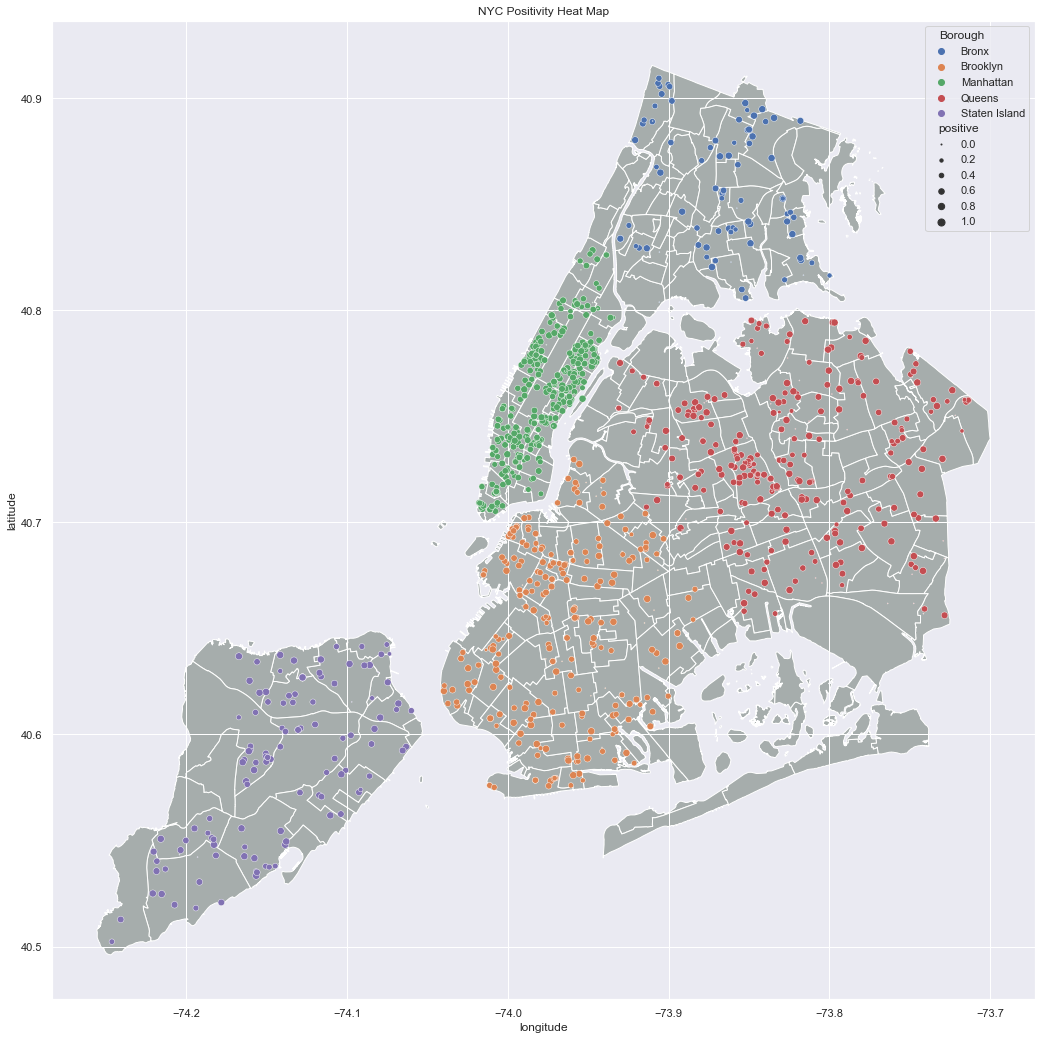

In [129]:
fig, ax = plt.subplots(figsize = (18,18))
ny_map.to_crs(epsg=4326).plot(ax=ax, color='#132a1350', zorder=0)
sns.scatterplot(ax=ax, x="longitude", y="latitude", hue="Borough",
                data=geo_df, size= "positive", zorder=1, sizes = (1,50))
ax.set_title('NYC Positivity Heat Map')
plt.show()

Graphically and in the describe table all of the entries have relatively even sentiment scoring. One last trick in the bag would be to implement ngram modeling to see if there are any phrase difference.

#### N-Gram Analysis

##### Deciding which n to use...

First I am going to evaluate the main corupus with all of the descriptions. The goal of the ngram is to produce some
abstraction of topic modeling. I want to see how common certain phrases occur, the more distinct the phrases are the better... Once completed I will choose an Ngram model to use and run it for each subsetted description data.

In [67]:
#Important Helper Functions for later
def text_creator(area):
    liste = []
    liste.extend(doc.lower() for doc in geo_df.Description[geo_df.Borough==area])
    words = ' '.join(liste)
    tokens_cleaned = [word for word in word_tokenize(words) if not word in s]
    text = ' '.join(tokens_cleaned)
    return text

def n_plotter(i,gram):
    plt.figure(figsize=(20,5))
    plt.title(names[i])
    plt.bar(range(len(gram)), list(gram.values()), align='center')
    plt.xticks(range(len(gram)), list(gram.keys()))
    plt.show()
    
def extract_ngrams(data, num):
    n_grams = ngrams(nltk.word_tokenize(data), num)
    return [ ' '.join(grams) for grams in n_grams]

##### text/ngram generation

In [68]:
tokens_cleaned = [word for word in word_tokenize(words) if not word in s]
text = ' '.join(tokens_cleaned)

In [69]:
trigram = extract_ngrams(text, 3)
bigram  = extract_ngrams(text, 2)
pentagram = extract_ngrams(text,5)
quadgram = extract_ngrams(text,4)

In [70]:
tri = {}
for x in trigram:
    tri[x] = text.count(x)

In [71]:
bi = {}
for x in bigram:
    bi[x] = text.count(x)

In [72]:
quad = {}
for x in quadgram:
    quad[x] = text.count(x)

In [73]:
penta = {}
for x in pentagram:
    penta[x] = text.count(x)

In [74]:
comtri = dict(Counter(tri).most_common(5))

In [75]:
combi = dict(Counter(bi).most_common(5))

In [76]:
comquad = dict(Counter(quad).most_common(5))
compenta = dict(Counter(penta).most_common(5))

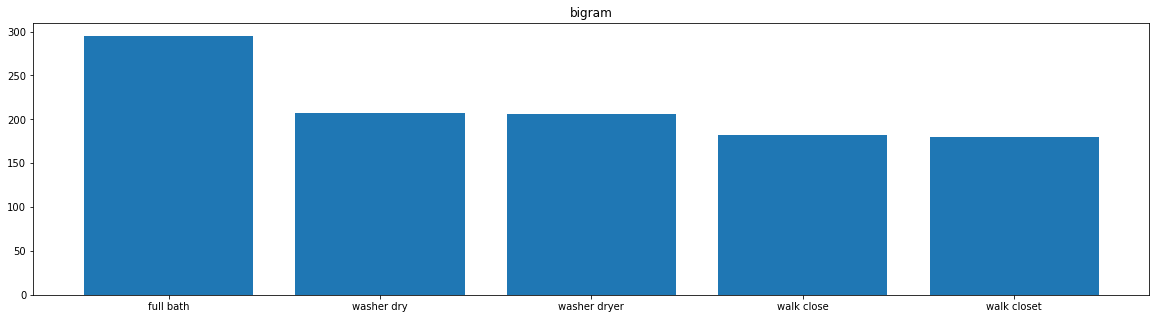

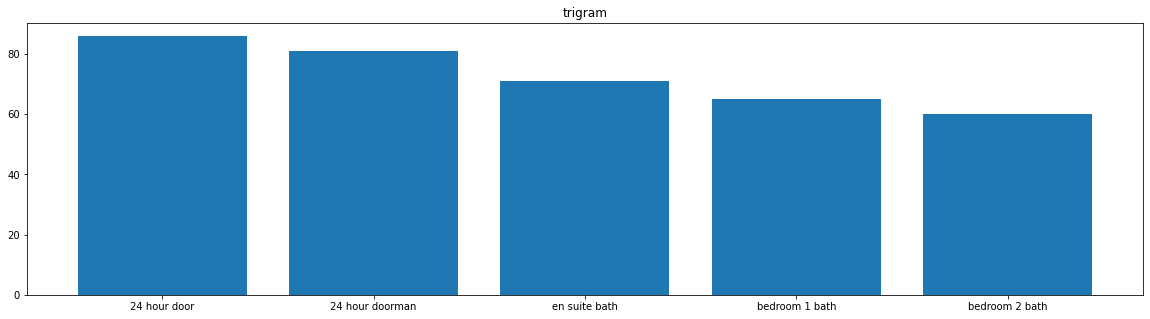

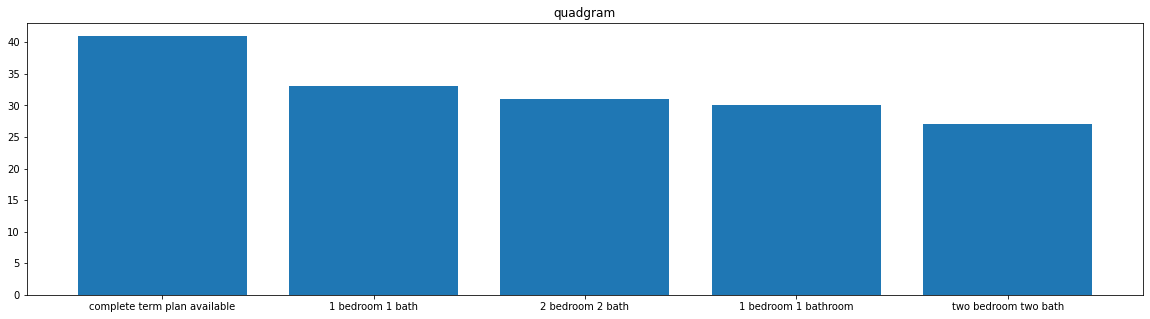

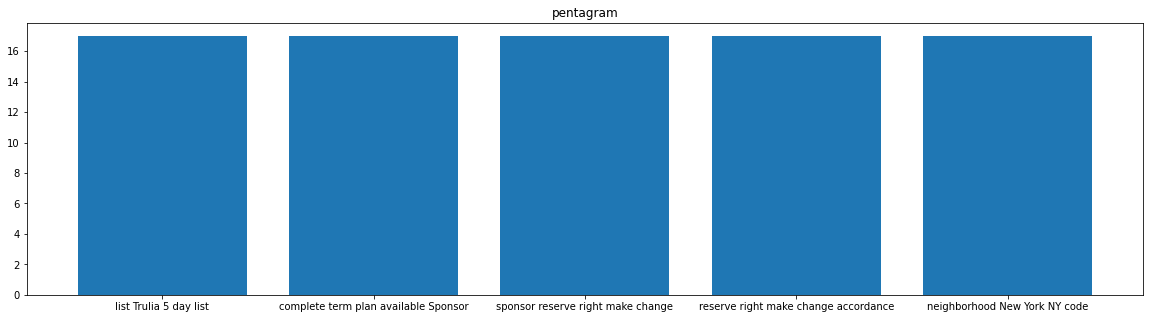

In [77]:
compenta = dict(Counter(penta).most_common(5))
comlist = [combi,comtri,comquad,compenta]
names= ['bigram','trigram','quadgram','pentagram']
for i,x in enumerate(comlist):
    n_plotter(i,x)

It seems like the bigram model works best.

##### Bigram By District

In [78]:
corpus_manhattan = []
corpus_manhattan.extend(doc for doc in geo_df.Description[geo_df.Borough=='Manhattan'])
corpus_bro = []
corpus_bro.extend(doc for doc in geo_df.Description[geo_df.Borough=='Brooklyn'])
corpus_brx = []
corpus_brx.extend(doc for doc in geo_df.Description[geo_df.Borough=='Bronx'])
corpus_que = []
corpus_que.extend(doc for doc in geo_df.Description[geo_df.Borough=='Queens'])
corpus_sta = []
corpus_sta.extend(doc for doc in geo_df.Description[geo_df.Borough=='Staten Island'])

In [79]:
text_manhattan = text_creator('Manhattan')
text_brooklyn = text_creator('Brooklyn')
text_bronx= text_creator('Bronx')
text_queens = text_creator('Queens')
text_staten = text_creator('Staten Island')

In [80]:
bigram_man  = extract_ngrams(text_manhattan, 2)
bigram_bro  = extract_ngrams(text_brooklyn, 2)
bigram_brx  = extract_ngrams(text_bronx, 2)
bigram_que  = extract_ngrams(text_queens, 2)
bigram_sta  = extract_ngrams(text_staten, 2)

In [81]:
bi_man = {}
for x in bigram_man:
    bi_man[x] = text_manhattan.count(x)/len(corpus_manhattan)
bi_bro = {}
for x in bigram_bro:
    bi_bro[x] = text_brooklyn.count(x)/len(corpus_bro)
bi_brx = {}
for x in bigram_brx:
    bi_brx[x] = text_bronx.count(x)/len(corpus_brx)
bi_que = {}
for x in bigram_que:
    bi_que[x] = text_queens.count(x)/len(corpus_que)
bi_sta = {}
for x in bigram_sta:
    bi_sta[x] = text_staten.count(x)/len(corpus_sta)

In [82]:
comman = dict(Counter(bi_man).most_common(7))
combro = dict(Counter(bi_bro).most_common(7))
combrx = dict(Counter(bi_brx).most_common(7))
comque = dict(Counter(bi_que).most_common(7))
comsta = dict(Counter(bi_sta).most_common(7))
comlist= [comman,combro,combrx,comque,comsta]
names = ['Manhattan','Brooklyn','Bronx','Queens','Staten Island']

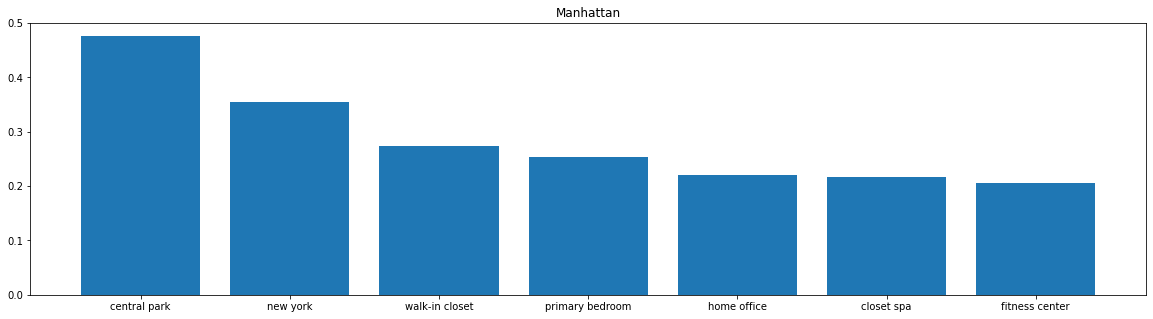

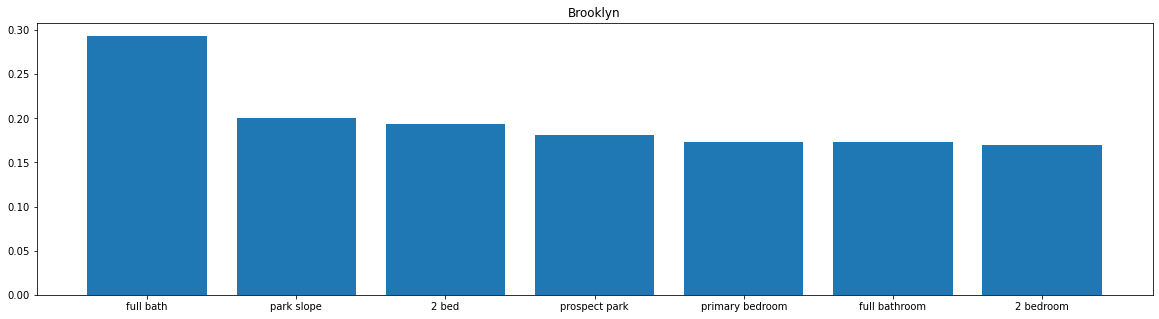

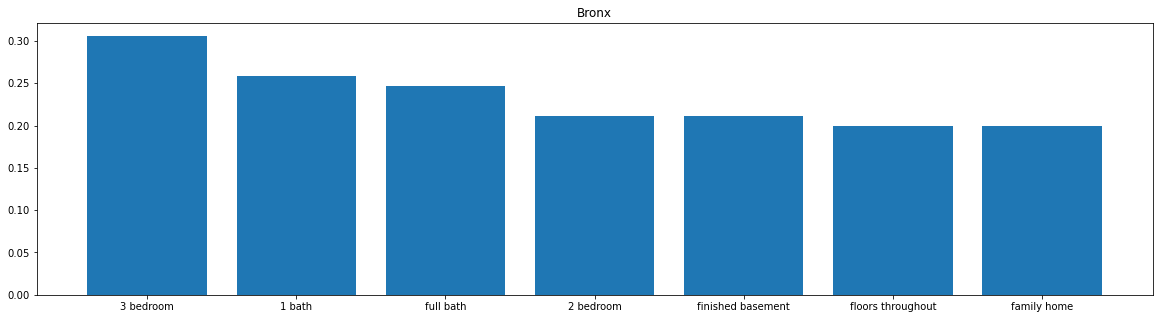

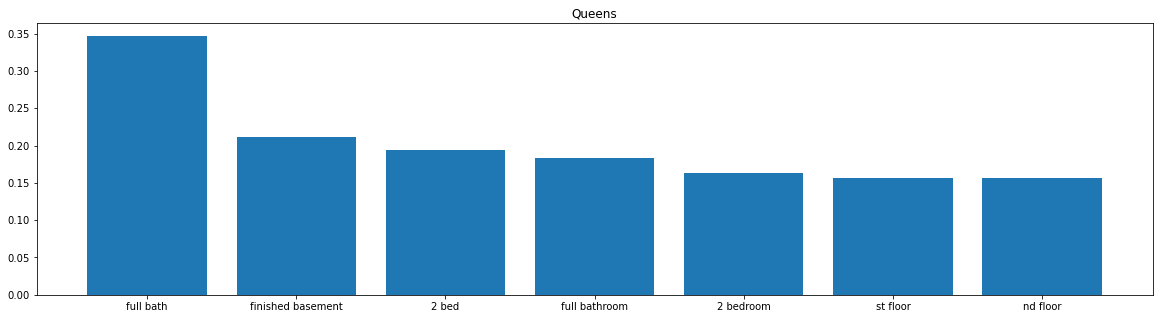

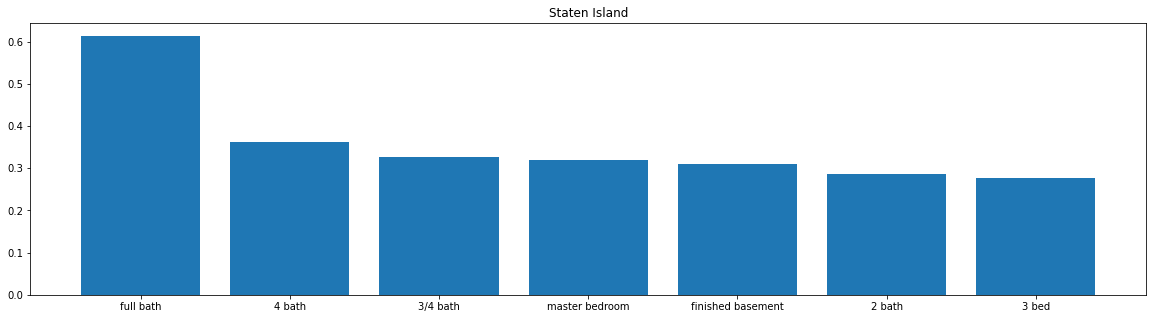

In [83]:
for i,x in enumerate(comlist):
    n_plotter(i,x)

The bigram chart revealed that there is a potential difference! The manhattan descrpitions have a higher frequency of specific luxorious features like fitness centers, walk-in closets and spas than the other districts. They also mention central park a lot which suggests the nice park is a walkable distance away. There is an emphasis on the exclusive property features over the regular features like full bath.

##### Cheap Half vs Expensive Half

In [84]:
corpus_cheap = []
corpus_cheap.extend(doc for doc in geo_df.Description[geo_df.price_log <= 13.7])
corpus_expensive = []
corpus_expensive.extend(doc for doc in geo_df.Description[geo_df.price_log > 13.7])

In [85]:
def text_creator2(price, is_less):
    liste = []
    if is_less:
        liste.extend(doc.lower() for doc in geo_df.Description[geo_df.price_log <= price])
    else:
        liste.extend(doc.lower() for doc in geo_df.Description[geo_df.price_log > price])
    words = ' '.join(liste)
    tokens_cleaned = [word for word in word_tokenize(words) if not word in s]
    text = ' '.join(tokens_cleaned)
    return text

In [86]:
text_che = text_creator2(13.7, True)
text_exp = text_creator2(13.7, False)

In [87]:
bigram_che  = extract_ngrams(text_che, 2)
bigram_exp  = extract_ngrams(text_exp, 2)

In [88]:
bi_che = {}
for x in bigram_che:
    bi_che[x] = text_che.count(x)/len(corpus_cheap)
bi_exp = {}
for x in bigram_exp:
    bi_exp[x] = text_exp.count(x)/len(corpus_expensive)

In [89]:
comche = dict(Counter(bi_che).most_common(7))
comexp = dict(Counter(bi_exp).most_common(7))
comlist= [comche,comexp]
names = ['Cheap','Expensive']

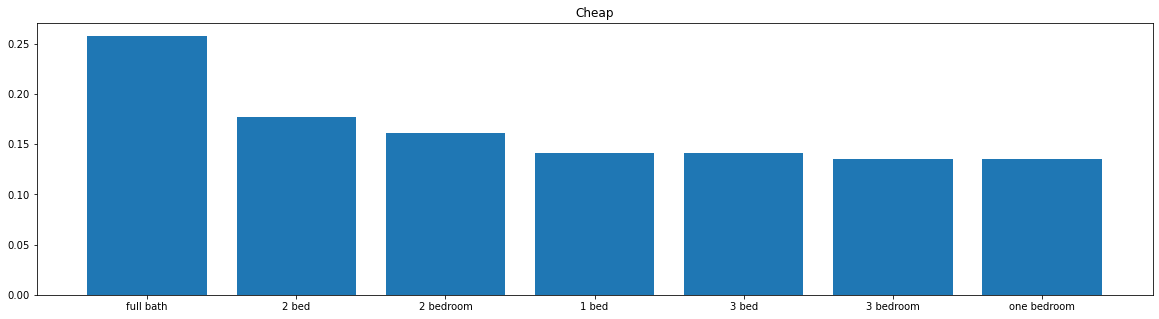

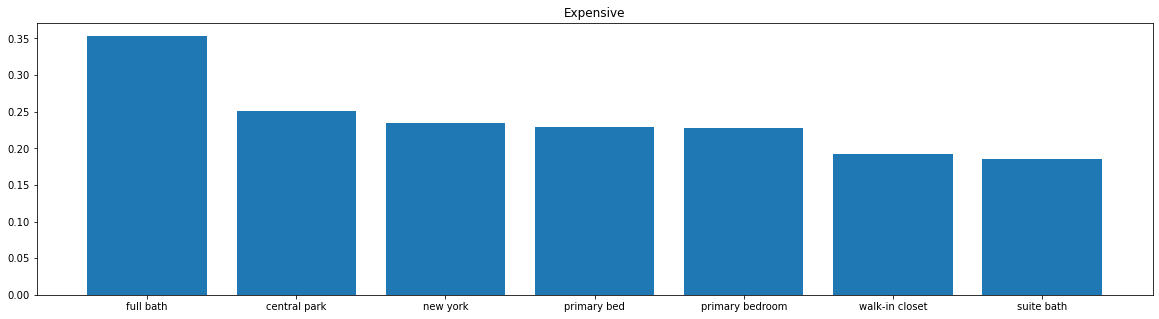

In [90]:
for i,x in enumerate(comlist):
    n_plotter(i,x)

The bigram results for cheaper vs pricier properties didn't yield good results like the district bigram, it could be because the more expensive entries are diluted with cheaper ones. Manhattan has the highest mean price with a lot of super expensive outliers. So to better assess the question it should be Manhattan versus the other four districts. A logistic classification model can be made.

###### *regen entries*

In [91]:
#Just regenerating the defualt entries
entries = []
for entry in descriptions:
    words_lemmas = []
    doc = nlp(entry)
    words_lemmas= [token.lemma_ for token in doc]
    entries.append(words_lemmas)

#### Model Creation

##### Generating Outcome Variables (Manhattan 1, others 0)

In [92]:
geo_df['Borough_num'] = (geo_df['Borough']=='Manhattan')
geo_df['Borough_num'] = geo_df['Borough_num'].astype(int)

In [93]:
geo_df.loc[geo_df.Borough == 'Manhattan']

,Location,Price,A/C,Description,longitude,latitude,geometry,Borough,price_log,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,Borough_num
1,"24 5th Ave #504 New York, NY",450000,No,"This coop is located at 24 5th Ave #504, New Y...",-73.995958,40.733112,POINT (-73.99596 40.73311),Manhattan,13.017003,0.333333,0.333333,0.333333,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,1
21,"370 E 76th St #C903 New York, NY",589000,Cooling only,ALL OPEN HOUSES ARE BY APPOINTMENT ONLYNew to ...,-73.954637,40.770489,POINT (-73.95464 40.77049),Manhattan,13.286181,0.000000,0.222222,0.000000,0.055556,0.222222,0.000000,0.722222,0.000000,0.055556,0.166667,1
22,"311 E 25th St #2A New York, NY",519999,No,For sale now at The Liberty in Manhattan: A Sp...,-73.979159,40.738948,POINT (-73.97916 40.73895),Manhattan,13.161582,0.066667,0.400000,0.000000,0.133333,0.333333,0.000000,0.800000,0.000000,0.200000,0.333333,1
23,"163 Saint Nicholas Ave #2J New York, NY",1125000,Cooling only,Welcome to this beautiful sun filled two bedro...,-73.952986,40.805432,POINT (-73.95299 40.80543),Manhattan,13.933294,0.048780,0.219512,0.073171,0.024390,0.292683,0.243902,0.731707,0.024390,0.073171,0.292683,1
24,"250 Mercer St #D401 New York, NY",995000,Cooling only,"This bright and stylish 1 bedroom loft, nestle...",-73.995139,40.728567,POINT (-73.99514 40.72857),Manhattan,13.810498,0.000000,0.333333,0.000000,0.000000,0.444444,0.000000,1.000000,0.111111,0.222222,0.111111,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,"812 5th Ave #10A New York, NY",8500000,Cooling only,One of New York City's prime high floor Fifth ...,-73.971274,40.766362,POINT (-73.97127 40.76636),Manhattan,15.955577,0.018868,0.207547,0.000000,0.037736,0.207547,0.056604,0.849057,0.018868,0.113208,0.264151,1
1140,"860 United Nations Plz #B New York, NY",4200000,Cooling only,SPRAWLING SKY HIGH DUPLEX Mansion in the sky w...,-73.966051,40.752572,POINT (-73.96605 40.75257),Manhattan,15.250595,0.046512,0.186047,0.069767,0.000000,0.232558,0.093023,0.860465,0.023256,0.093023,0.418605,1
1144,"400 E 59th St #12D New York, NY",849000,No,Sutton Place ParadiseYou want Pre-War grace wi...,-73.961716,40.759397,POINT (-73.96172 40.75940),Manhattan,13.651814,0.028571,0.085714,0.057143,0.057143,0.257143,0.057143,0.828571,0.057143,0.171429,0.228571,1
1145,"50 Bond St #3 New York, NY",6995000,Cooling only,Beautifully Renovated Private Floor Loft with ...,-73.992670,40.726051,POINT (-73.99267 40.72605),Manhattan,15.760706,0.000000,0.400000,0.000000,0.000000,0.350000,0.050000,0.850000,0.000000,0.150000,0.350000,1


In [94]:
borough_pct = geo_df['Borough'].value_counts(normalize = True).round(2) * 100 
borough_pct

Manhattan        31.0
Queens           27.0
Brooklyn         24.0
Staten Island    11.0
Bronx             8.0
Name: Borough, dtype: float64

##### Creating a luxury score metric

This is similar to the emolex sentiment scoring method but instead I will generate a luxury score for each entry. Based on this score the model should predict if it belongs to Manhattan or not.

In [95]:
def scorer(entries, liste):
    dic = {}
    ind = geo_df.index.tolist()
    for i,entry in enumerate(entries):
        var = 0
        for x in liste:
            if x in str(entry).lower():
                var+=1
        dic[ind[i]] = var
    return(dic)

In [96]:
lux = ['doorman','24','spa','fitness','gym','suite','expensive','chef',"chef's",'penthouse','walk-in closet','city view',
       'rich','exclusive','breathtaking']

In [97]:
scores = scorer(entries, lux)

In [98]:
df = pd.DataFrame(scores,index=['lux_score'])
values = df.columns
df = df.T
frames = [geo_df , df]
geo_df = pd.concat(frames, axis=1, join='inner')
geo_df = geo_df.fillna(0)

In [99]:
geo_df[['Borough','lux_score','Borough_num']].groupby('Borough').describe()

lux_score                                                \
                  count      mean       std  min   25%  50%  75%  max   
Borough                                                                 
Bronx              85.0  0.894118  0.926123  0.0  0.00  1.0  1.0  5.0   
Brooklyn          259.0  1.459459  1.494595  0.0  0.00  1.0  2.0  7.0   
Manhattan         336.0  2.901786  1.713649  0.0  1.75  3.0  4.0  8.0   
Queens            294.0  0.972789  1.126446  0.0  0.00  1.0  1.0  6.0   
Staten Island     119.0  0.831933  0.866704  0.0  0.00  1.0  1.0  4.0   

              Borough_num                                     
                    count mean  std  min  25%  50%  75%  max  
Borough                                                       
Bronx                85.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Brooklyn            259.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Manhattan           336.0  1.0  0.0  1.0  1.0  1.0  1.0  1.0  
Queens              294.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
Staten Island       119.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0

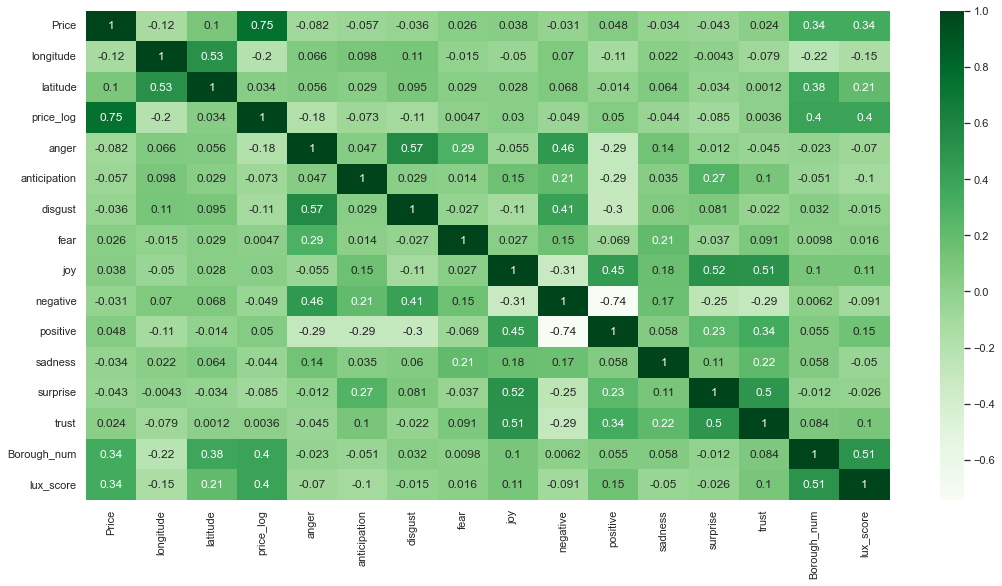

In [101]:
cor = geo_df.corr()
sns.set(rc = {'figure.figsize':(18,9)})
sns.heatmap(cor, annot=True, cmap=plt.cm.Greens)
plt.show()

Logistic regressor must have balanced class weights due to different amount of entries in each side. There is also a decent correlation with borough and the newly generated lux_score.

<AxesSubplot:xlabel='lux_score', ylabel='Borough_num'>

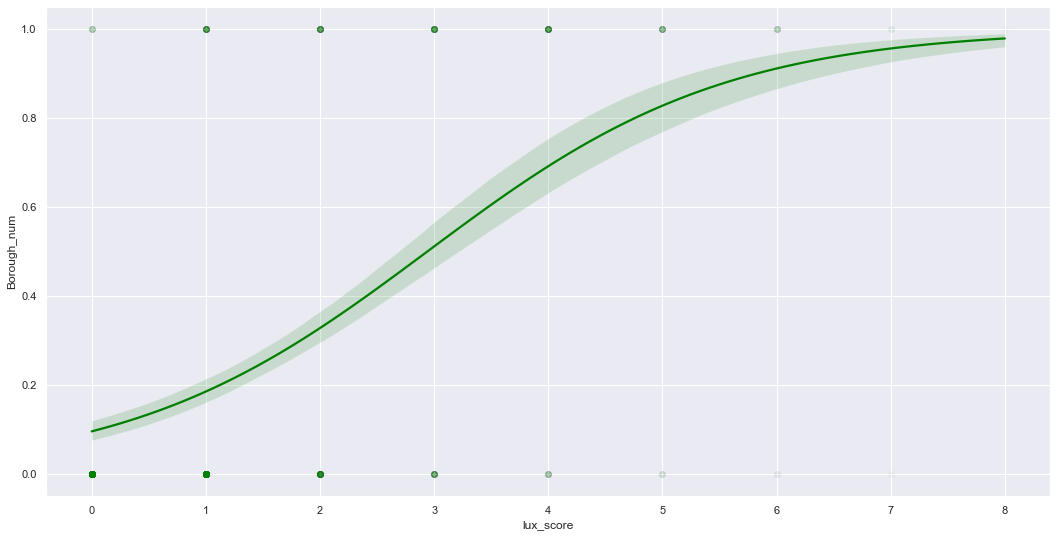

In [111]:
sns.regplot(x="lux_score", y="Borough_num", data=geo_df, logistic=True, scatter_kws={'alpha':0.01},color='green')

In [103]:
log = LogisticRegression(class_weight='balanced',max_iter=1000)
X_train, X_test, y_train, y_test = train_test_split(geo_df['lux_score'], geo_df['Borough_num'], test_size=0.30, random_state=90)

log.fit(np.array(X_train).reshape(-1,1),y_train)

predictions = log.predict(np.array(X_test).reshape(-1,1))
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.73      0.79       222
           1       0.58      0.77      0.66       106

    accuracy                           0.74       328
   macro avg       0.72      0.75      0.73       328
weighted avg       0.78      0.74      0.75       328



The baseline accuracy would be to claim that all properties are non-Manhattan. This model would yield 69% accuracy. Since the weighted average for all metrics exceeds this 69% accuracy the model is plausible to use. 

In [115]:
def logit(x):
    return 1 / (np.exp(-x) + 1)
m = log.coef_[0][0]
b= log.intercept_[0]
c = 2
x = m * c + b
print('chance of listing belonging in Manhattan with a lux_score of 2: '+str(round(logit(x)*100,2))+'%')
print('the model used is: 1/[1+e^(-'+str(round(m,5))+'*price'+str(round(b,2))+')]')

chance of listing belonging in Manhattan with a lux_score of 2: 53.15%
the model used is: 1/[1+e^(-0.83021*price-1.53)]


### Statistical Validation

Fraction of permuted slopes absolutely greater (magnitude wise) than our observed slope: 0.0


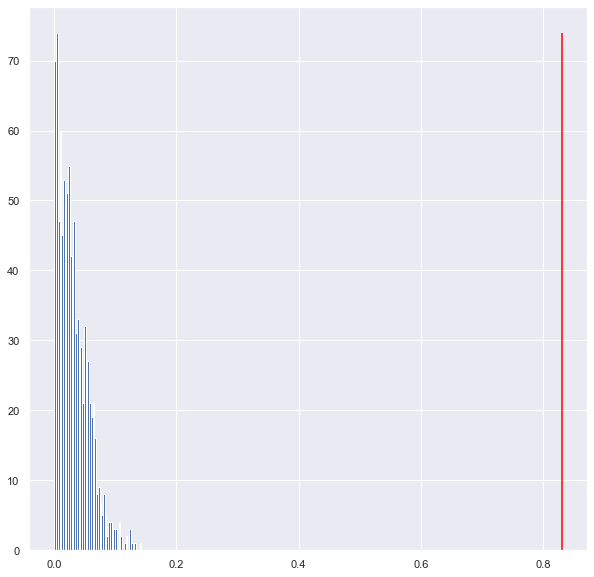

In [158]:
#Helper functions
def plot_model_line(df, model, is_resampled):
    if is_resampled:
        color="grey"
        alpha=0.01
    else:
        color="orange"
        alpha=0.8
    plt.scatter(
    geo_df['lux_score'], 
    model.predict_proba(geo_df[['lux_score']])[:,1], 
    alpha = alpha,
    color = color,
    label='Predicted probability of a property belonging to Manhattan'
)
    
def permute(input_array):
    permuted = input_array.copy().values 
    np.random.shuffle(permuted)
    return pd.Series(permuted)

obs_slope = log.coef_[0]
obs_intercept = log.intercept_

steeper_slopes = 0
n_permutations = 1000
permuted_slopes = np.zeros(n_permutations)

for i in range(n_permutations):
    permuted_model = LogisticRegression(class_weight = 'balanced',max_iter=1000).fit(geo_df[['lux_score']], permute(geo_df['Borough_num']))
    permuted_slopes[i] = permuted_model.coef_[0]
    if np.abs(permuted_model.coef_[0]) > np.abs(obs_slope):
        steeper_slopes += 1
    
print(f'Fraction of permuted slopes absolutely greater (magnitude wise) than our observed slope:\
 {steeper_slopes / n_permutations}')

binsizes, _, _ = plt.hist(np.abs(permuted_slopes), bins=50)
plt.vlines(np.abs(obs_slope), ymin=0, ymax=np.max(binsizes), color='red')
plt.show()

Here's another cool way to make the log regression plot from above.

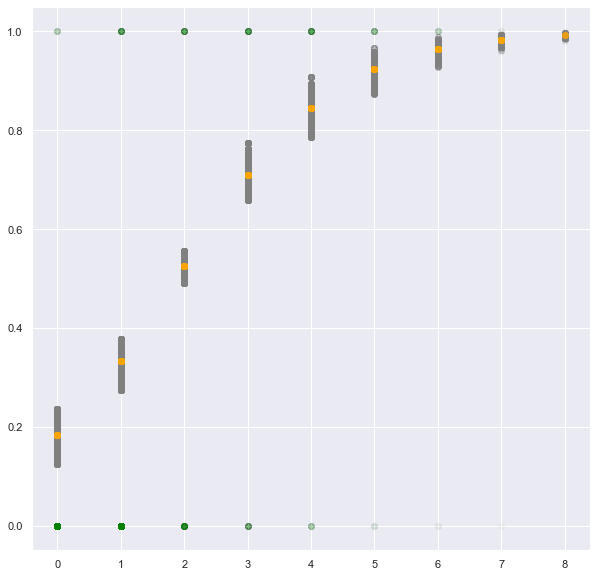

In [159]:
# plot true data
plt.scatter(x=geo_df['lux_score'], y=geo_df['Borough_num'], color = 'green', alpha = .01)

# plot 1000 iterations of models on resampled data
for i in range(1000):
    resampled_data = geo_df.sample(n=len(geo_df), replace=True)
    resampled_model = LogisticRegression(class_weight='balanced').fit(resampled_data[['lux_score']], resampled_data['Borough_num'])
    plot_model_line(geo_df, resampled_model, True)

# model true data and plot
model = LogisticRegression(class_weight='balanced',max_iter=1000).fit(geo_df[['lux_score']], geo_df['Borough_num'])
plot_model_line(geo_df, model, is_resampled=False)
    
plt.show()

[0.69111665 0.91488046]


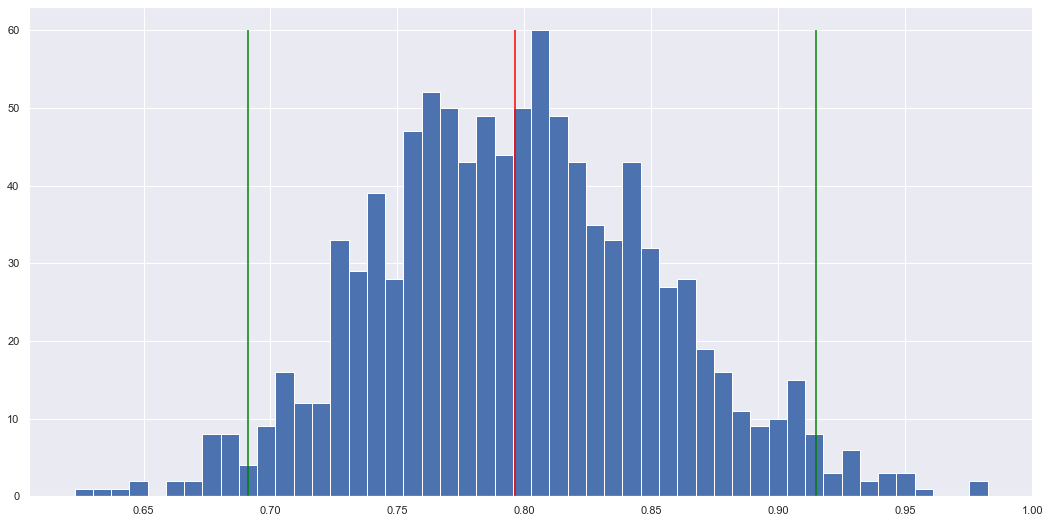

In [118]:
n_bootstrap = 1000
bootstrap_slopes = np.zeros(n_bootstrap)

for i in range(n_bootstrap):
    resampled_data = geo_df.sample(n=len(geo_df), replace=True)
    resampled_model = LogisticRegression(class_weight='balanced').fit(resampled_data[['lux_score']], resampled_data['Borough_num'])
    
    bootstrap_slopes[i] = resampled_model.coef_[0]
print(np.quantile(bootstrap_slopes, q=[0.025, 0.975]))
binsizes, _, _ = plt.hist(bootstrap_slopes, bins=50)
plt.vlines(model.coef_[0], ymin=0, ymax=np.max(binsizes), color='red')
plt.vlines(np.quantile(bootstrap_slopes, q=[0.025])[0], ymin=0, ymax=np.max(binsizes), color='green')
plt.vlines(np.quantile(bootstrap_slopes, q=[0.975])[0], ymin=0, ymax=np.max(binsizes), color='green')
plt.show()

The results are verified, our model is acceptable, it lands within the accepted confidence interval and has a lower p value than .05. The logistical model constructed above may be used to predict whether a NYC property is located in Manhattan.

#### Answer (short):

Yes the Manhattan district features distinct description phrases when compared to the other districts. Exclusivity and descriptive luxuries set the manhattan listings apart from the other ones.

### Results

#### Word Cloud

The wordclouds essentially acted as makeshift unigrams with easy to understand outputs. Subsetting the dataset by borough and by price afterwards yielded similar word clouds. Since the displays for each borough show no significant change in words displayed then there are a lot of words generally shared within the advertisements (which makes sense). The advertisements must present common things like room counts, square footage. They also mention common attributes of a home like washers/ kitchens etc. Removing stopwords wouldn't help much since it would remove important context. For example Chef's Kitchen appeared frequently in the manhattan n-gram visualization. Removing kitchen would result in just Chef's, is there a Chef's kitchen, a Chef's living area, a nice Chef's resturant nearby? Altogether the word cloud method served the purpose of getting a sense of how similar listings in different subsets are, and apparently they share a lot of common language.

#### Clustering

The ward clustering didn't produce significant results. As predicted there was one giant cluster. Unlike the prediction there were no condensed mini clusters. The distribution was more of a fade distribtuion in no general direction. This suggests that a lot of the listings shared a lot of similar traits. The outliers differed from the main cluster in a variety of different ways. It appears the ward clustering label weren't determined by borough nor price range, the clustering method likely labeled on how objective the description is and also took into word count/frequency.  

#### Sentiment Analysis

The sentiment analysis aimed to observe if there were any distinct sentiment scores amongst the difference properties. The properties amongst all the boroughs scored relatively the same across the board. This simply suggests that the descriptions are presented in a manner that doesn't evoke distinct emotions. Specifically anticipation/joy/trust scored high and positivity scored really high. The negative emotion scored lower than these. This means that generally listings curate some sense of joy/anticipation about the property resulting in a positive sentiment score. These results should be taken lightly due to the questionable effectiveness of emolex in contextual sitations.

#### N-gram Analysis

The bigram chart by district revealed that there is a difference in phrases used! The manhattan descrpitions have a higher frequency of specific luxorious features like fitness centers, walk-in closets and spas than the other districts. They also mention central park a lot which suggests the nice park is a walkable distance away. There is an emphasis on the exclusive property features over the regular features like full bath that the other properties harp on. The manhattan descriptions make sure to include what makes them so exclusive. The bigram results for cheaper vs pricier properties didn't yield good results like the district bigram, it could be because the more expensive entries are diluted with cheaper ones. Manhattan has the highest mean price with a lot of super expensive outliers. The price bigrams suggest that across all price ranges the descriptions include similar listing description phrases.

#### Model Creation

The bigram by district lends itself to logistic classification. I developed an easy way to create a luxury score derived from the listing and generated one for each listing. Based on the luxury score it is possible to develop a decent logistic classifcaiton model to tell if a property belongs in Manhattan or not. 

#### Statistical Validation

The model is statistically valid, it passed the permuatation test and it fits within a bootstrapped confidence interval. The model also produces better results than a baseline predictor.


### Discussion and Conclusions

#### Limitations

There two significant limitations with this investigation. First the dataset scraping was difficult to do. Not all of the textual and numeric data could be derived. It not only would take an extremely long time but the scraper would stop if one listing was missing an attribute. There's also the issue with outlier removal, not all of each district is include (like upper mannhattan). The ARCgis locator worked most of the time but still produce some incorrect results. 

The other significant limitation is the luxury scorer isn't perfect. The score is based on the inclusion of certain exclusive attributes, it isn't an extensive list of all the possible luxury features/words. It also doesn't take into account the context of the description. Like what if it is saying there's a fitness center in the complex (included in price) or if there is a fitness center nearby. The scores aren't perfect and can be improved. Creating a fleshed out luxury scorer with some form of contextualization would improve the scoring model and it could strengthen or weaken the logisitc model.  

Another limitation worth mentioning is the lack of sale conversion data. This experiment is meant to assess whether or not the difference in advertisements actually has an influence on sales. The data provided doesn't investigate if Manhattan properites take longer to sell than other places. There's also factors that would arise in this question like how many people can actually afford these places and would want to consider these places. Description data is not the sole variable that influences buying behavior, it relies on the person. It would be really hard to simulate this portion of the experiment in a controlled environment. The question I investigated tackles the prelude to this difficult problem. 

#### Overall Conclusion

Overall the answer to the main prospectus is yes, there is a difference in advertising descriptions within NYC listings. Manhattan listings pronounce their exclusivity while all the other boroughs keep a relatively consistent word composition with their listing descriptions. They all follow a similar structural format.

It is plausible to assume that listings with better brand features as well as being more well known will naturally be more appealing to buyers. It makes sense intuitvely, people naturally want nicer things and if an ad brings up more features it would simply be a better advert. Again it is hard to make a solid conclusion due to the aforementioned limitations and it doesn't directly answer the overarching question of how it determines advertising effectiveness.

This dilemma raises a few other questions. If mentioning features does have an effect on sales of a product, what is that relation? How does this translate into different markets?

#### What's Next

To continue this investigation part two has to be executed. Sales conversion data would have to be obtained which would be rather difficult. A property historical sales book would have to be scraped and historical listings with all attributes used in part one (like descriptions and housing price) would be needed.

Another aspect would be to conduct a advert heatmap study specific to real estate listings. It would investigate if these specific attributes actually draw attention and enable the market placebo affect. NLP methods would still be involved with some metric converting gaze time at a certain word or object being converted into a scorable metric. This is working off of the assumption that gaze time correlates with want then it would be possible to develop a housing want metric as well.

Further improving the luxury scorer dictonary is also another thing to be done. Maybe it is possible to create a list of exclusive items in a house by leveraging a meaning similarity network from a couple of root words and appending words that aren't too different in the list. 

Once all of this is done then solid conclusions can be made. Through the use of these methods it would be possible to fully investigate the effects of textual features in real estate ads on buying decisions. 